In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Загрузка

In [2]:
raw_data = pd.read_parquet("..\\Data\\raw\\dataset.parquet")
raw_data.head()

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_tx_timestamp,risky_last_tx_timestamp,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,outgoing_tx_sum_eth,incoming_tx_sum_eth,outgoing_tx_avg_eth,incoming_tx_avg_eth,max_eth_ever,min_eth_ever,total_balance_eth,risk_factor,total_collateral_eth,total_collateral_avg_eth,total_available_borrows_eth,total_available_borrows_avg_eth,avg_weighted_risk_factor,risk_factor_above_threshold_daily_count,avg_risk_factor,max_risk_factor,borrow_amount_sum_eth,borrow_amount_avg_eth,borrow_count,repay_amount_sum_eth,repay_amount_avg_eth,repay_count,borrow_repay_diff_eth,deposit_count,deposit_amount_sum_eth,time_since_first_deposit,withdraw_amount_sum_eth,withdraw_deposit_diff_if_positive_eth,liquidation_count,time_since_last_liquidated,liquidation_amount_sum_eth,market_adx,market_adxr,market_apo,market_aroonosc,market_aroonup,market_atr,market_cci,market_cmo,market_correl,market_dx,market_fastk,market_fastd,market_ht_trendmode,market_linearreg_slope,market_macd_macdext,market_macd_macdfix,market_macd,market_macdsignal_macdext,market_macdsignal_macdfix,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,0.000981,0,0,999999999,999999999,0,0.0,975.686105,958.353127,1.174111,1.153253,61.680231,0.060948,58.317987,0.000001,44.479139,0.000000,31.575270,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0,0.000000,6,44.410991,4026.0,0.0,0.0,0,999999999.0,0.0,22.357432,31.489909,-3.914837,67.777778,7.142857,9.047057,111.965749,19.928594,0.878363,31.02392,80.653832,57.459322,1,0.423859,-3.914837,1.326453,1.406507,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,0.000983,0,0,999999999,999999999,0,0.0,975.686105,958.510238,1.171292,1.150673,61.680231,0.060948,58.317987,0.004953,44.479139,44.479139,31.418863,31.575270,0.000000,0.0,0.000001,0.000001,0.157110,0.157110,1,0.0,0.0,0,0.157110,6,44.410991,4165.0,0.0,0.0,0,999999999.0,0.0,22.357432,31.489909,-3.914837,67.777778,7.142857,9.047057,111.965749,19.928594,0.878363,31.02392,80.653832,57.459322,1,0.423859,-3.914837,1.326453,1.406507,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,0.000985,0,0,999999999,999999999,0,0.0,975.686105,958.896402,1.168486,1.148379,61.680231,0.060948,58.317987,0.017103,44.479139,44.479139,31.035236,31.497067,0.000387,0.0,0.002477,0.004953,0.543275,0.271637,2,0.0,0.0,0,0.543275,6,44.410991,4215.0,0.0,0.0,0,999999999.0,0.0,22.357432,31.489909,-3.914837,67.777778,7.142857,9.047057,111.965749,19.928594,0.878363,31.02392,80.653832,57.459322,1,0.423859,-3.914837,1.326453,1.406507,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,0.010786,0,0,999999999,999999999,0,0.0,0.103772,0.803077,0.001596,0.012355,0.000000,0.000000,0.000000,0.000001,0.000767,0.000000,0.000460,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0,0,0.000000,1,0.000772,7661.0,0.0,0.0,0,999999999.0,0.0,22.357432,31.489909,-3.914837,67.777778,7.142857,9.047057,111.965749,19.928594,0.878363,31.02392,80.653832,57.459322,1,0.423859,-3.914837,1.326453,1.4065

In [5]:
raw_data.sample().to_parquet('../Test Cases/Sample_1.parquet')
raw_data.sample().to_parquet('../Test Cases/Sample_2.parquet')
raw_data.sample().to_parquet('../Test Cases/Sample_3.parquet')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442961 entries, 0 to 442960
Data columns (total 78 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   borrow_block_number                      442961 non-null  int64  
 1   borrow_timestamp                         442961 non-null  float64
 2   wallet_address                           442961 non-null  object 
 3   first_tx_timestamp                       442961 non-null  float64
 4   last_tx_timestamp                        442961 non-null  float64
 5   wallet_age                               442961 non-null  float64
 6   incoming_tx_count                        442961 non-null  int64  
 7   outgoing_tx_count                        442961 non-null  int64  
 8   net_incoming_tx_count                    442961 non-null  int64  
 9   total_gas_paid_eth                       442961 non-null  float64
 10  avg_gas_paid_per_tx_eth         

In [5]:
def infer_fastapi_fields(df: pd.DataFrame) -> dict:
    type_map = {
        "int64": "int",
        "float64": "float",
        "object": "str",
        "bool": "bool"
    }

    fields = {}
    for col in df.columns:
        dtype = str(df[col].dtype)
        fields[col] = type_map.get(dtype, "str")  # по умолчанию str
    return fields

df = raw_data.sample(1)  # подгрузи 1 строку
fields = infer_fastapi_fields(df)
fields

{'borrow_block_number': 'int',
 'borrow_timestamp': 'float',
 'wallet_address': 'str',
 'first_tx_timestamp': 'float',
 'last_tx_timestamp': 'float',
 'wallet_age': 'float',
 'incoming_tx_count': 'int',
 'outgoing_tx_count': 'int',
 'net_incoming_tx_count': 'int',
 'total_gas_paid_eth': 'float',
 'avg_gas_paid_per_tx_eth': 'float',
 'risky_tx_count': 'int',
 'risky_unique_contract_count': 'int',
 'risky_first_tx_timestamp': 'int',
 'risky_last_tx_timestamp': 'int',
 'risky_first_last_tx_timestamp_diff': 'int',
 'risky_sum_outgoing_amount_eth': 'float',
 'outgoing_tx_sum_eth': 'float',
 'incoming_tx_sum_eth': 'float',
 'outgoing_tx_avg_eth': 'float',
 'incoming_tx_avg_eth': 'float',
 'max_eth_ever': 'float',
 'min_eth_ever': 'float',
 'total_balance_eth': 'float',
 'risk_factor': 'float',
 'total_collateral_eth': 'float',
 'total_collateral_avg_eth': 'float',
 'total_available_borrows_eth': 'float',
 'total_available_borrows_avg_eth': 'float',
 'avg_weighted_risk_factor': 'float',
 'ris

In [11]:
for i, j in fields.items():
    print('\t',i + ': ' + j + ',')

	 borrow_block_number: int,
	 borrow_timestamp: float,
	 wallet_address: str,
	 first_tx_timestamp: float,
	 last_tx_timestamp: float,
	 wallet_age: float,
	 incoming_tx_count: int,
	 outgoing_tx_count: int,
	 net_incoming_tx_count: int,
	 total_gas_paid_eth: float,
	 avg_gas_paid_per_tx_eth: float,
	 risky_tx_count: int,
	 risky_unique_contract_count: int,
	 risky_first_tx_timestamp: int,
	 risky_last_tx_timestamp: int,
	 risky_first_last_tx_timestamp_diff: int,
	 risky_sum_outgoing_amount_eth: float,
	 outgoing_tx_sum_eth: float,
	 incoming_tx_sum_eth: float,
	 outgoing_tx_avg_eth: float,
	 incoming_tx_avg_eth: float,
	 max_eth_ever: float,
	 min_eth_ever: float,
	 total_balance_eth: float,
	 risk_factor: float,
	 total_collateral_eth: float,
	 total_collateral_avg_eth: float,
	 total_available_borrows_eth: float,
	 total_available_borrows_avg_eth: float,
	 avg_weighted_risk_factor: float,
	 risk_factor_above_threshold_daily_count: float,
	 avg_risk_factor: float,
	 max_risk_factor: 

# Анализ датасета
## 1. Общая характеристика данных:

**Тип данных**: Транзакционная активность криптовалютных кошельков в Ethereum-подобной блокчейн-сети.

**Целевая переменная**: target (бинарная метка: 1 - рискованное поведение, 0 - нормальное).

**Размер**: 442961 строк, 78 признаков.

**Контекст**: Данные связаны с кредитными операциями (займы, погашения) и рыночными индикаторами. Вероятно, используются для предсказания кредитных рисков или мошенничества.

## 2. Ключевые группы признаков:

### A. Идентификация и время
**wallet_address**: Уникальный адрес кошелька (хеш).

**_timestamp**: Временные метки операций (в формате Unix).

**wallet_age**: Возраст кошелька в секундах.

### B. Транзакционная активность
**incoming/outgoing_tx_**: Статистика по входящим/исходящим транзакциям (количество, суммы в ETH).

**total_gas_paid_eth**: Комиссии за транзакции.

**risky_**: Метрики рискованных операций (количество, контракты, суммы).

### C. Кредитные операции
**borrow_**, **repay_**, **deposit_**, **withdraw_**:

Суммы, количества, средние значения займов/погашений.

**borrow_repay_diff_eth**: Разница между займами и погашениями.

**liquidation_**: Данные о ликвидациях залогов.

### D. Финансовые метрики
**max/min/total_balance_eth**: Баланс кошелька.

**total_collateral_eth**: Залоговые средства.

**total_available_borrows_eth**: Доступный кредитный лимит.

### E. Факторы риска
**risk_factor**, **avg_risk_factor**, **max_risk_factor**: Оценки риска.

**risk_factor_above_threshold_daily_count**: Дни с высоким риском.

### F. Рыночные индикаторы (технический анализ)
**market_**: 30+ показателей (например, macd, rsi, volatility):

**adx, atr, cci, macd** — индикаторы тренда и волатильности.

**aroonosc, stochastic** — осцилляторы.

**Пример**: market_rocr (Rate of Change Ratio) — темп изменения цены.

### G. Протоколы
**unique_borrow/lending_protocol_count**: Количество уникальных DeFi-протоколов, используемых кошельком.

# EDA

## 1. Выбросы

In [5]:
numeric_columns = raw_data.select_dtypes(include=["number"]).columns.to_list()
numeric_columns.remove("target")
numeric_columns[:5]

['borrow_block_number',
 'borrow_timestamp',
 'first_tx_timestamp',
 'last_tx_timestamp',
 'wallet_age']

In [6]:
raw_data[numeric_columns].describe()

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_tx_timestamp,risky_last_tx_timestamp,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,outgoing_tx_sum_eth,incoming_tx_sum_eth,outgoing_tx_avg_eth,incoming_tx_avg_eth,max_eth_ever,min_eth_ever,total_balance_eth,risk_factor,total_collateral_eth,total_collateral_avg_eth,total_available_borrows_eth,total_available_borrows_avg_eth,avg_weighted_risk_factor,risk_factor_above_threshold_daily_count,avg_risk_factor,max_risk_factor,borrow_amount_sum_eth,borrow_amount_avg_eth,borrow_count,repay_amount_sum_eth,repay_amount_avg_eth,repay_count,borrow_repay_diff_eth,deposit_count,deposit_amount_sum_eth,time_since_first_deposit,withdraw_amount_sum_eth,withdraw_deposit_diff_if_positive_eth,liquidation_count,time_since_last_liquidated,liquidation_amount_sum_eth,market_adx,market_adxr,market_apo,market_aroonosc,market_aroonup,market_atr,market_cci,market_cmo,market_correl,market_dx,market_fastk,market_fastd,market_ht_trendmode,market_linearreg_slope,market_macd_macdext,market_macd_macdfix,market_macd,market_macdsignal_macdext,market_macdsignal_macdfix,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
count,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,442961.000000,4.429610e+05,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,442961.000000,442961.000000,4.429610e+05,442961.000000,442961.000000,4.429610e+05,442961.000000,4.429610e+05,4.429610e+05,4.429610e+05,4.429610e+05,442961.000000,4.429610e+05,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000,442961.000000
mean,1.304907e+07,1.629225e+09,1.593978e+09,1.629120e+09,3.524693e+07,777.858238,2.196224e+03,-1418.365727,26.898496,0.015685,118.291513,18.720851,1.483994e+09,1.497026e+09,1.303211e+07,2.312860e+04,1.071285e+05,1.030546e+05,31.891906,34.240437,3293.453482,52.325908,694.387333,3.962781e-01,2.049909e+04,1.789052e+04,4.895394e+03,4.367259e+03,4.131114e+05,1.100482e+04,6.412336e+02,1.047412e+04,3.198687e+04,254.333833,60.942146,2.832242e+04,236.234129,46.051842,3.846236e+03,72.793492,7.197097e+04,1.339951e+07,6.876133e+04,2.551999e+03,1.420249,8.609501e+08,430.922616,29.604374,29.423627,24.066601,32.058062,55.477054,109.312105,18.217131,8.251718,0.913005,30.450721,56.966047,56.697879,0.925154,2.865477,24.066601,21.992984,23.078122,25.942980,22.369506,23.478711,-0.650871,6.102657,23.324148,1062.136487,2.020113,0.038512,1.038512,0.975084,1.223742
std,2.231888e+06,2.972367e+07,4.485955e+07,2.970179e+07,3.828899e+07,2306.781076,2.803049e+04,27699.991076,141.471489,0.030737,314.279904,35.596185,2.515203e+08,2.584733e+08,1.759031e+07,2.230375e+05,7.097087e+05,6.549361e+05,250.161534,347.284152,24106.098047,3553.626154,11720.783608,3.233820e-01,2.053302e+05,1.686949e+05,4.843559e+04,4.775998e+04,2.336790e+07,1.401958e+05,1.371635e+05,1.218293e+06,2.117642e+05,1780.437846,202.519253,1.972640e+05,1532.593397,175.857355,3.489476e+04,318.035593,5.461413e+05,1.774955e+07,5.720235e+05,1.339883e+05,10.950239,3.444881e+08,4726.303397,10.312947,8.829776,167.874876,62.

In [7]:
raw_data[numeric_columns].mode()

,borrow_block_number,borrow_timestamp,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_tx_timestamp,risky_last_tx_timestamp,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,outgoing_tx_sum_eth,incoming_tx_sum_eth,outgoing_tx_avg_eth,incoming_tx_avg_eth,max_eth_ever,min_eth_ever,total_balance_eth,risk_factor,total_collateral_eth,total_collateral_avg_eth,total_available_borrows_eth,total_available_borrows_avg_eth,avg_weighted_risk_factor,risk_factor_above_threshold_daily_count,avg_risk_factor,max_risk_factor,borrow_amount_sum_eth,borrow_amount_avg_eth,borrow_count,repay_amount_sum_eth,repay_amount_avg_eth,repay_count,borrow_repay_diff_eth,deposit_count,deposit_amount_sum_eth,time_since_first_deposit,withdraw_amount_sum_eth,withdraw_deposit_diff_if_positive_eth,liquidation_count,time_since_last_liquidated,liquidation_amount_sum_eth,market_adx,market_adxr,market_apo,market_aroonosc,market_aroonup,market_atr,market_cci,market_cmo,market_correl,market_dx,market_fastk,market_fastd,market_ht_trendmode,market_linearreg_slope,market_macd_macdext,market_macd_macdfix,market_macd,market_macdsignal_macdext,market_macdsignal_macdfix,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count
0,15551386,1.663394e+09,1.522918e+09,1.701649e+09,30910033.0,3,3,0,0.0,0.0,0,0,999999999,999999999,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0,999999999.0,0.0,18.118934,19.954308,-39.660897,81.111111,100.0,61.796867,-227.340279,-37.490987,0.920799,44.854127,100.0,10.283314,1,-13.893118,-39.660897,-29.753335,-31.505453,-5.272404,-7.946219,-8.488701,-0.60856,4.052365,14.808638,112.544637,-2.471236,-0.110261,0.889739,1,1


In [8]:
raw_data[raw_data["risky_first_tx_timestamp"] == 999999999]

,borrow_block_number,borrow_timestamp,wallet_address,first_tx_timestamp,last_tx_timestamp,wallet_age,incoming_tx_count,outgoing_tx_count,net_incoming_tx_count,total_gas_paid_eth,avg_gas_paid_per_tx_eth,risky_tx_count,risky_unique_contract_count,risky_first_tx_timestamp,risky_last_tx_timestamp,risky_first_last_tx_timestamp_diff,risky_sum_outgoing_amount_eth,outgoing_tx_sum_eth,incoming_tx_sum_eth,outgoing_tx_avg_eth,incoming_tx_avg_eth,max_eth_ever,min_eth_ever,total_balance_eth,risk_factor,total_collateral_eth,total_collateral_avg_eth,total_available_borrows_eth,total_available_borrows_avg_eth,avg_weighted_risk_factor,risk_factor_above_threshold_daily_count,avg_risk_factor,max_risk_factor,borrow_amount_sum_eth,borrow_amount_avg_eth,borrow_count,repay_amount_sum_eth,repay_amount_avg_eth,repay_count,borrow_repay_diff_eth,deposit_count,deposit_amount_sum_eth,time_since_first_deposit,withdraw_amount_sum_eth,withdraw_deposit_diff_if_positive_eth,liquidation_count,time_since_last_liquidated,liquidation_amount_sum_eth,market_adx,market_adxr,market_apo,market_aroonosc,market_aroonup,market_atr,market_cci,market_cmo,market_correl,market_dx,market_fastk,market_fastd,market_ht_trendmode,market_linearreg_slope,market_macd_macdext,market_macd_macdfix,market_macd,market_macdsignal_macdext,market_macdsignal_macdfix,market_macdsignal,market_max_drawdown_365d,market_natr,market_plus_di,market_plus_dm,market_ppo,market_rocp,market_rocr,unique_borrow_protocol_count,unique_lending_protocol_count,target
0,7711117,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973049.0,199,438,-239,0.397391,0.000981,0,0,999999999,999999999,0,0.0,975.686105,958.353127,1.174111,1.153253,61.680231,0.060948,58.317987,0.000001,44.479139,0.000000,31.575270,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000e+00,0.000000,0,0.000000e+00,6,4.441099e+01,4026.0,0.000000e+00,0.000000e+00,0,999999999.0,0.0,22.357432,31.489909,-3.914837,67.777778,7.142857,9.047057,111.965749,19.928594,0.878363,31.023920,80.653832,57.459322,1,0.423859,-3.914837,1.326453,1.406507,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,0,1,1
1,7711123,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973188.0,200,439,-239,0.399063,0.000983,0,0,999999999,999999999,0,0.0,975.686105,958.510238,1.171292,1.150673,61.680231,0.060948,58.317987,0.004953,44.479139,44.479139,31.418863,31.575270,0.000000,0.0,0.000001,0.000001,1.571105e-01,0.157110,1,0.000000e+00,0.000000,0,1.571105e-01,6,4.441099e+01,4165.0,0.000000e+00,0.000000e+00,0,999999999.0,0.0,22.357432,31.489909,-3.914837,67.777778,7.142857,9.047057,111.965749,19.928594,0.878363,31.023920,80.653832,57.459322,1,0.423859,-3.914837,1.326453,1.406507,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
2,7711126,1.557197e+09,0x502cb8985b2c92a8d4bf309cdaa89de9be442708,1.537224e+09,1.557197e+09,19973238.0,201,440,-239,0.400895,0.000985,0,0,999999999,999999999,0,0.0,975.686105,958.896402,1.168486,1.148379,61.680231,0.060948,58.317987,0.017103,44.479139,44.479139,31.035236,31.497067,0.000387,0.0,0.002477,0.004953,5.432747e-01,0.271637,2,0.000000e+00,0.000000,0,5.432747e-01,6,4.441099e+01,4215.0,0.000000e+00,0.000000e+00,0,999999999.0,0.0,22.357432,31.489909,-3.914837,67.777778,7.142857,9.047057,111.965749,19.928594,0.878363,31.023920,80.653832,57.459322,1,0.423859,-3.914837,1.326453,1.406507,-3.468973,1.163425,1.212219,-0.895911,4.479356,33.216622,33.415526,-2.370346,0.104294,1.104294,1,1,1
3,7711672,1.557205e+09,0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6,1.557191e+09,1.557198e+09,13922.0,8,56,-48,0.604001,0.010786,0,0,999999999,999999999,0,0.0,0.103772,0.803077,0.001596,0.012355,0.000000,0.000000,0.000000,0.000001,0.000767,0.000000,0.000460,0.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000,0,0.000000e+00,0.000000,0,0.000000e+00,1,7.723285e-04,7661.0,0.000000e+00,0.000000

В столбцах `risky_first_tx_timestamp`,`risky_last_tx_timestamp`,`time_since_last_liquidated` пропуски явно заполнены `999999999`. Заполним их `np.nan`, чтобы при стандартизации это не повлияло на результат

In [9]:
raw_data["risky_first_tx_timestamp"] = raw_data["risky_first_tx_timestamp"].apply(lambda x: x if x != 999999999 else np.nan)
raw_data["risky_last_tx_timestamp"] = raw_data["risky_last_tx_timestamp"].apply(lambda x: x if x != 999999999 else np.nan)
raw_data["time_since_last_liquidated"] = raw_data["time_since_last_liquidated"].apply(lambda x: x if x != 999999999 else np.nan)

Большинство данных имеет `log` нормальное распределение. Что означает, что нужно как минимум логарифмировать входящие значения

<Axes: >

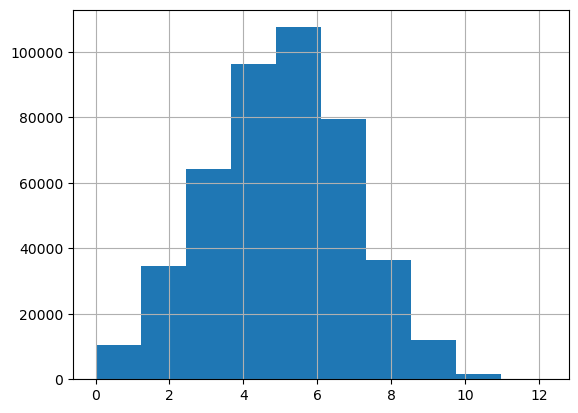

In [10]:
raw_data["incoming_tx_count"].apply(lambda x: np.log(x) if x > 0 else 0).hist()

## Поиск экстремальных значений

In [11]:
extreme_columns = []
for col in numeric_columns:
    # Во сколько раз максимальное значение превосходит 95 перцентиль после логарифмирования
    over = raw_data[col].apply(lambda x: np.log(x) if x >= 1 else np.nan).max() / np.log(raw_data[col].quantile(0.95))
    if over > 1.4:
        print(col, " : ", over)
        extreme_columns.append(col)
print(len(extreme_columns))

incoming_tx_count  :  1.5021940135381338
outgoing_tx_count  :  1.5935180957471855
net_incoming_tx_count  :  6.802127457709447
total_gas_paid_eth  :  1.9506752404584795
risky_tx_count  :  1.44958854668264
risky_unique_contract_count  :  1.5246005810019843
risky_sum_outgoing_amount_eth  :  1.5478415418795264
outgoing_tx_avg_eth  :  2.2593952347243893
incoming_tx_avg_eth  :  2.3920767421322315
max_eth_ever  :  1.5078599680816394
min_eth_ever  :  5.963538000825774
total_balance_eth  :  2.035478304164204
total_collateral_eth  :  1.541292899133365
total_collateral_avg_eth  :  1.488094035035497
total_available_borrows_eth  :  1.6638699674051933
total_available_borrows_avg_eth  :  1.59087549698191
avg_weighted_risk_factor  :  2.4020120569785814
risk_factor_above_threshold_daily_count  :  1.6978299378690411
borrow_amount_sum_eth  :  1.4903799073477695
borrow_amount_avg_eth  :  1.777010948636162
borrow_count  :  1.59483799862423
repay_amount_sum_eth  :  1.5265874669208686
repay_amount_avg_eth  :

C:\Temp\ipykernel_7648\3153091594.py:3: RuntimeWarning: invalid value encountered in scalar divide
  over = raw_data[col].apply(lambda x: np.log(x) if x >= 1 else np.nan).max() / np.log(raw_data[col].quantile(0.95))
C:\Temp\ipykernel_7648\3153091594.py:3: RuntimeWarning: invalid value encountered in log
  over = raw_data[col].apply(lambda x: np.log(x) if x >= 1 else np.nan).max() / np.log(raw_data[col].quantile(0.95))


market_plus_dm  :  1.9962116844446796
market_rocr  :  2.0239372059685916
unique_borrow_protocol_count  :  2.0
33


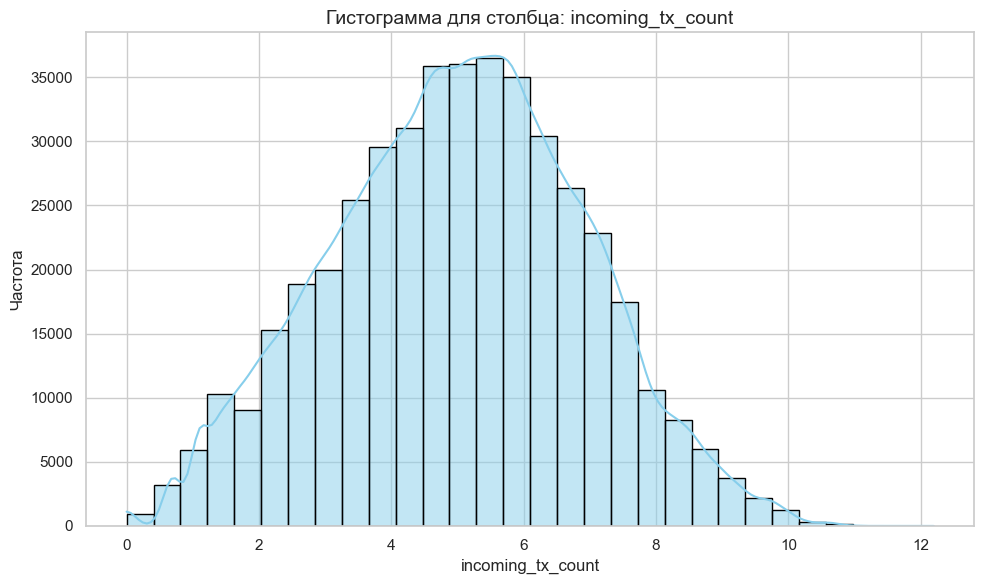

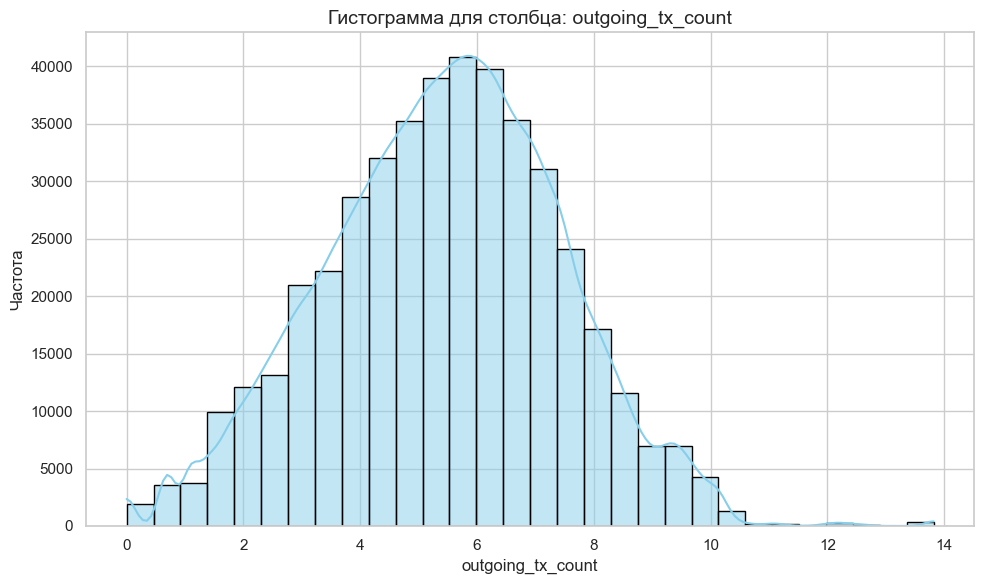

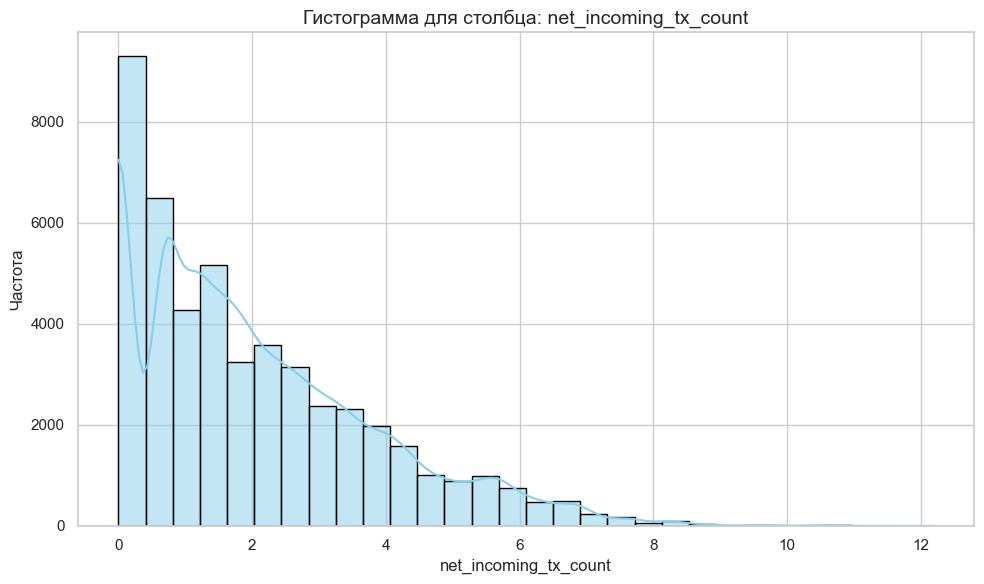

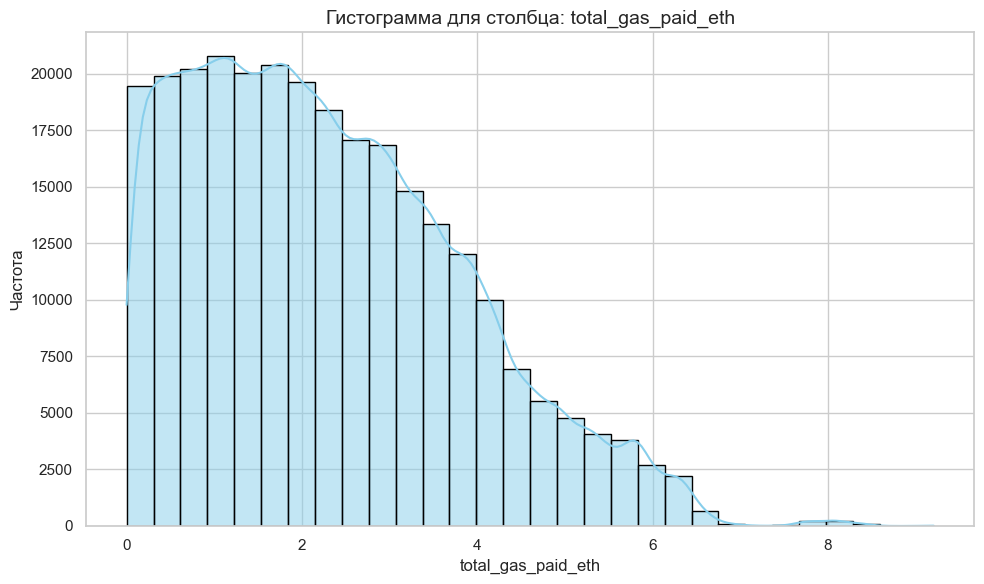

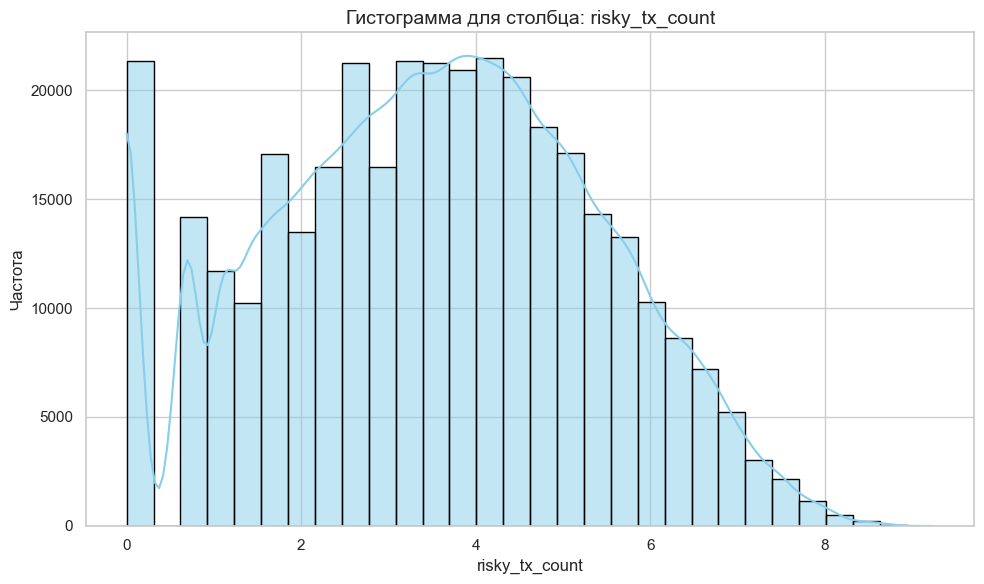

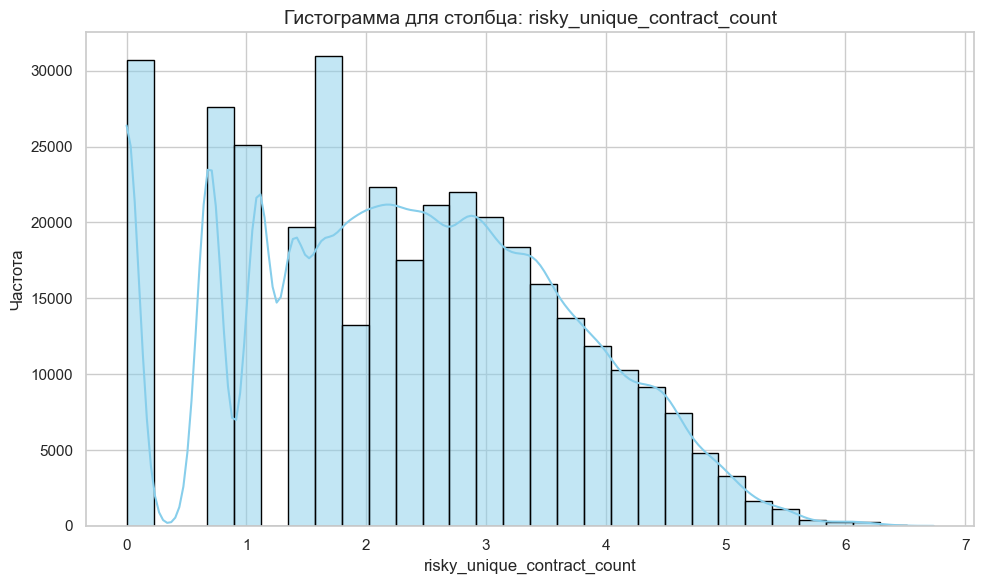

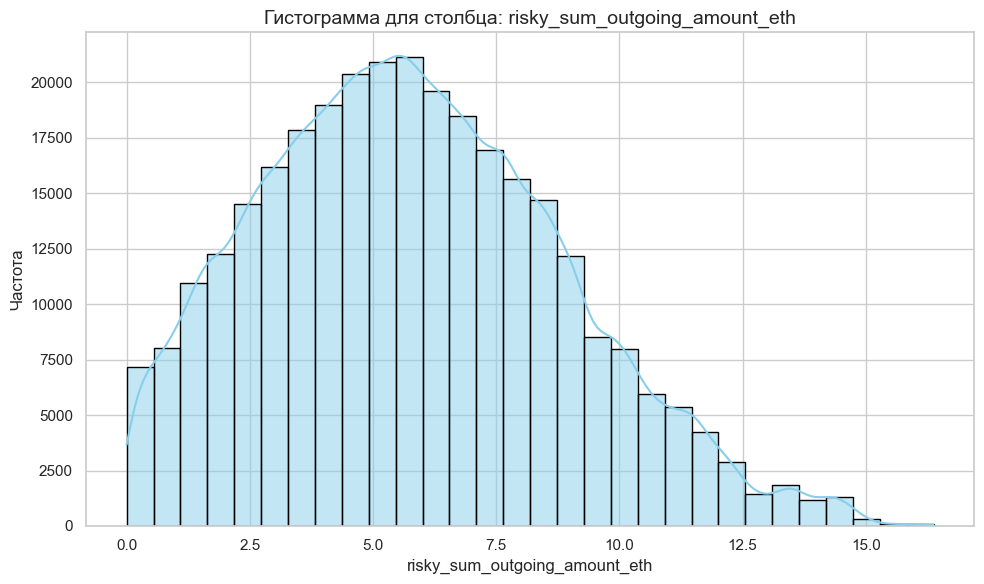

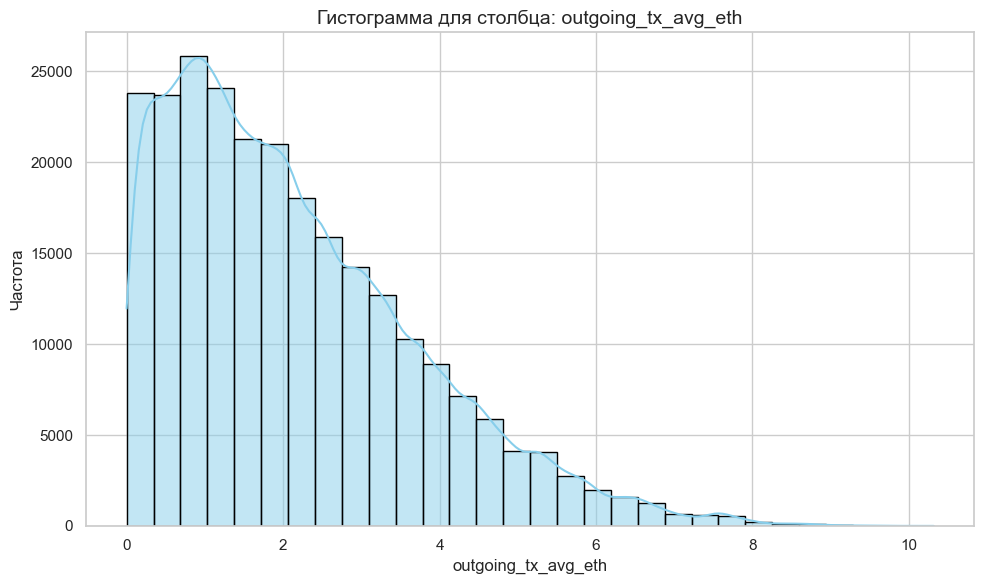

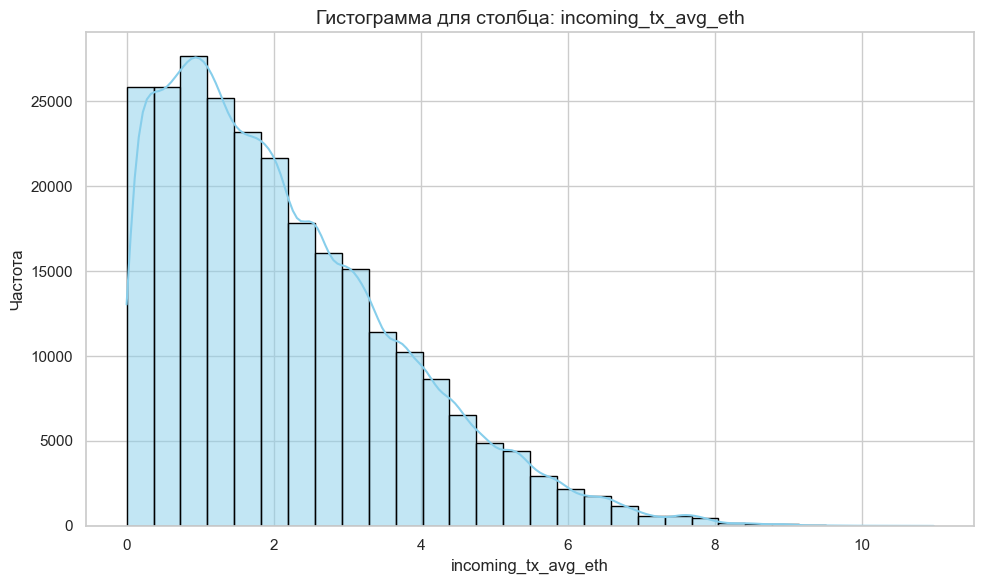

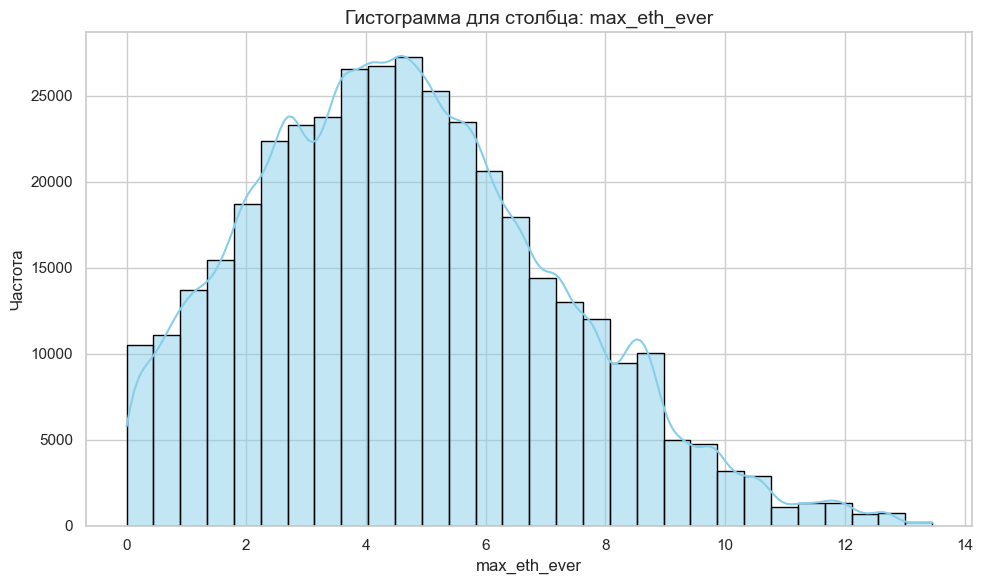

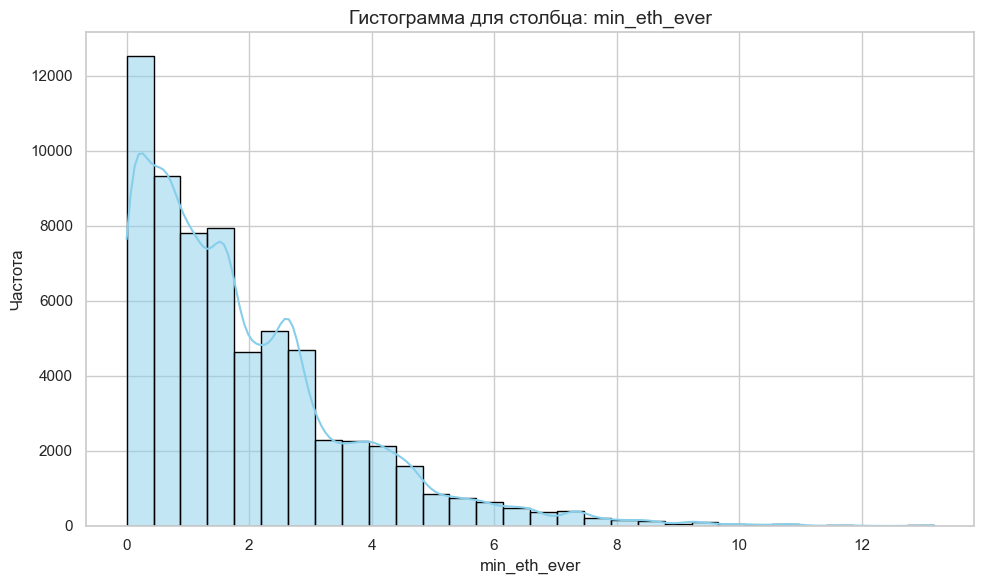

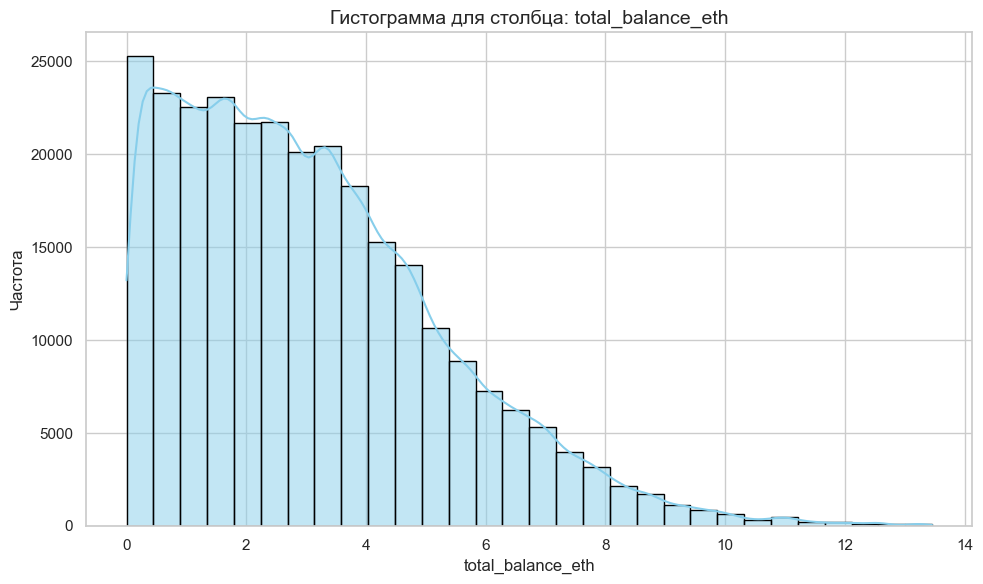

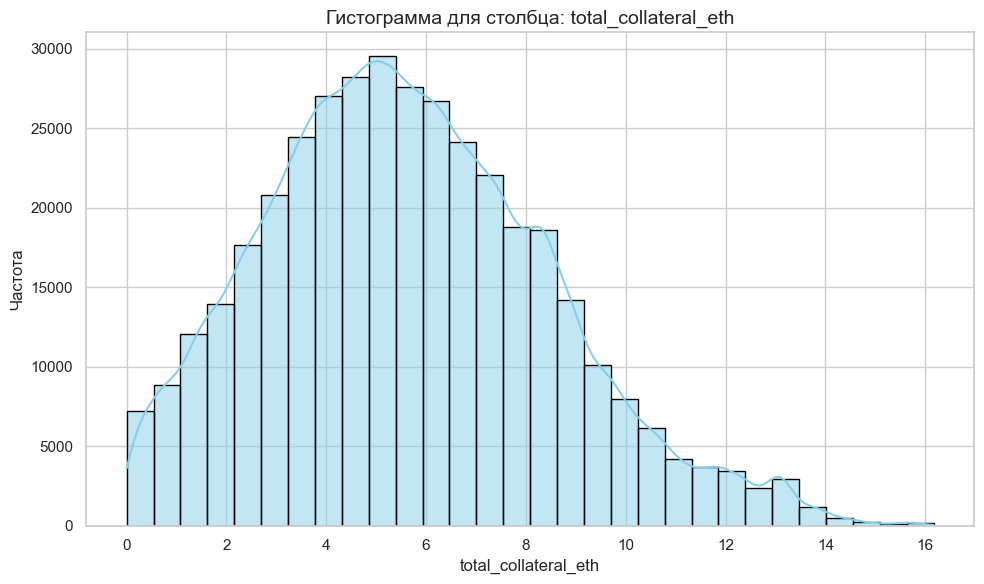

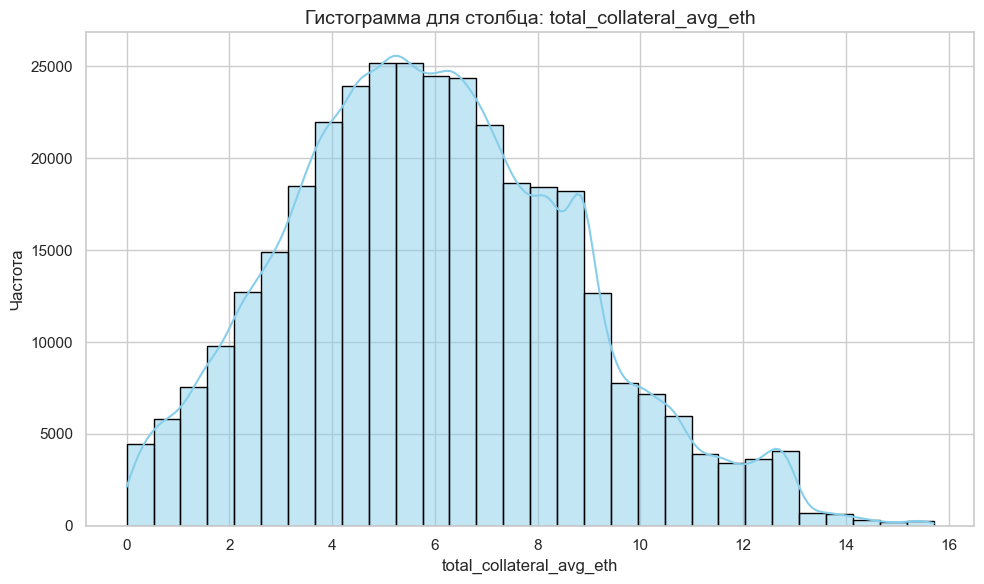

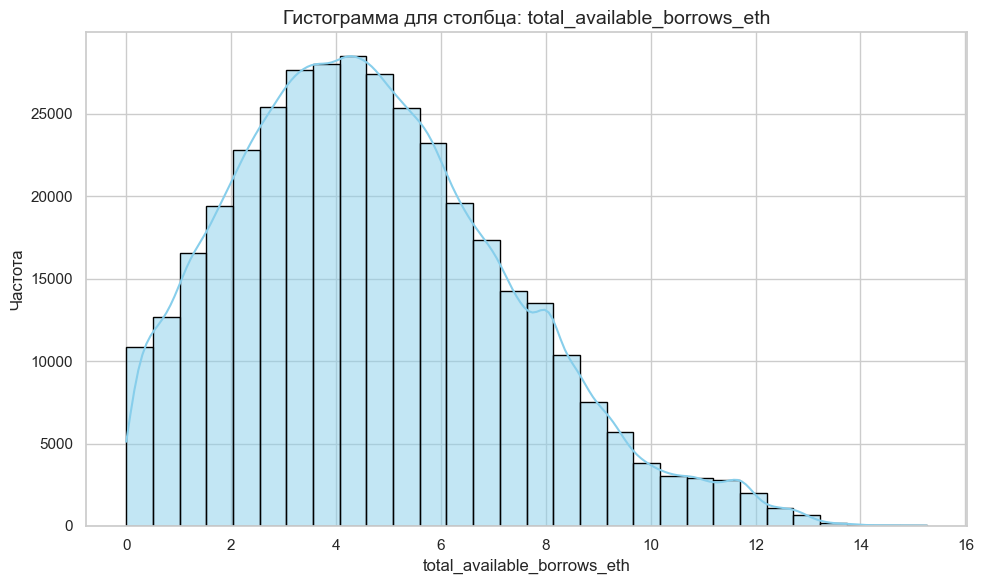

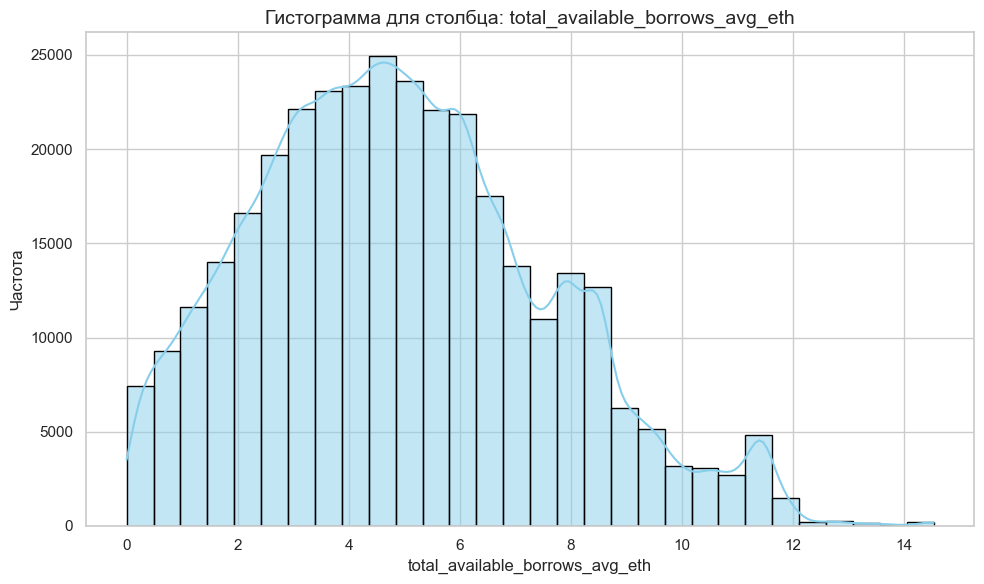

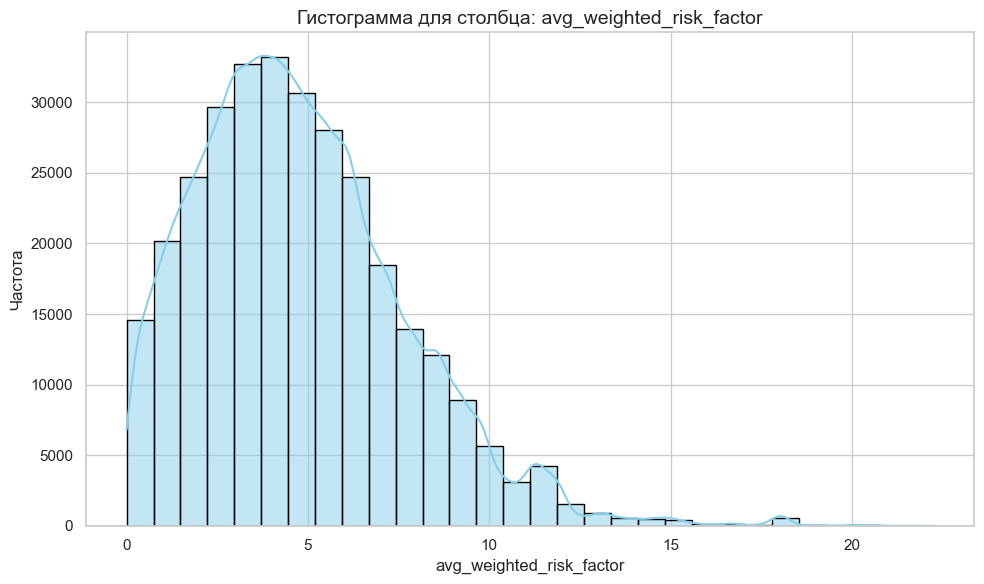

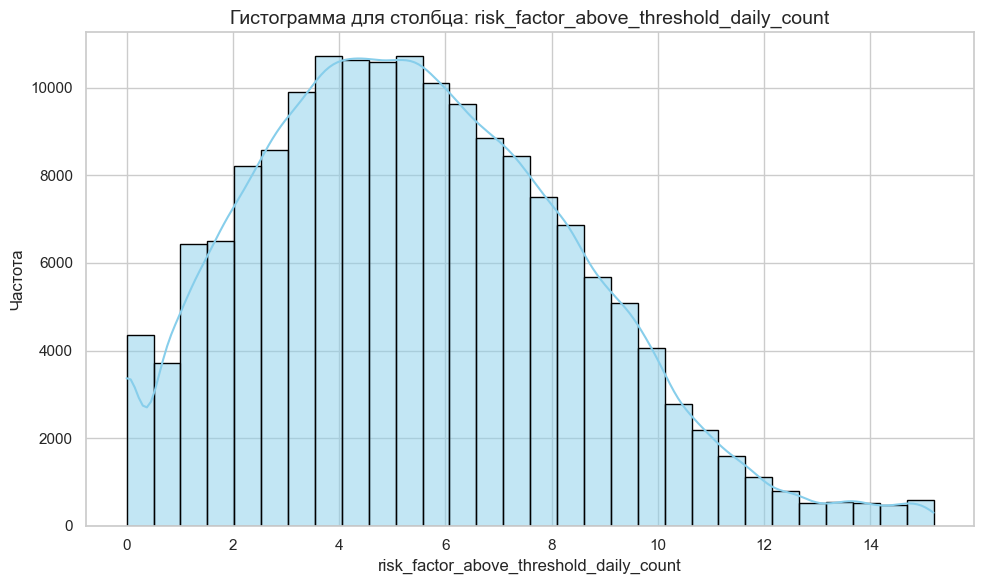

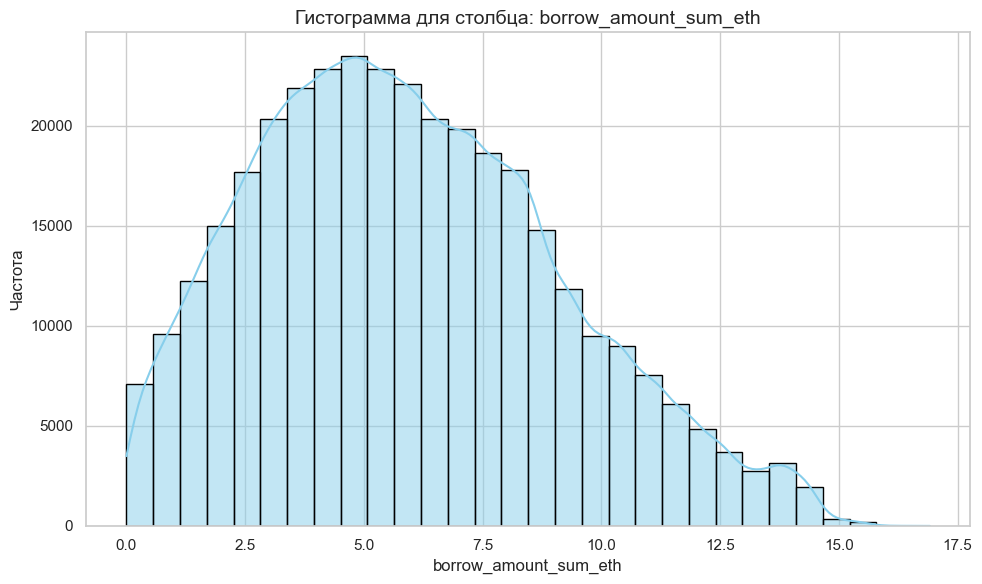

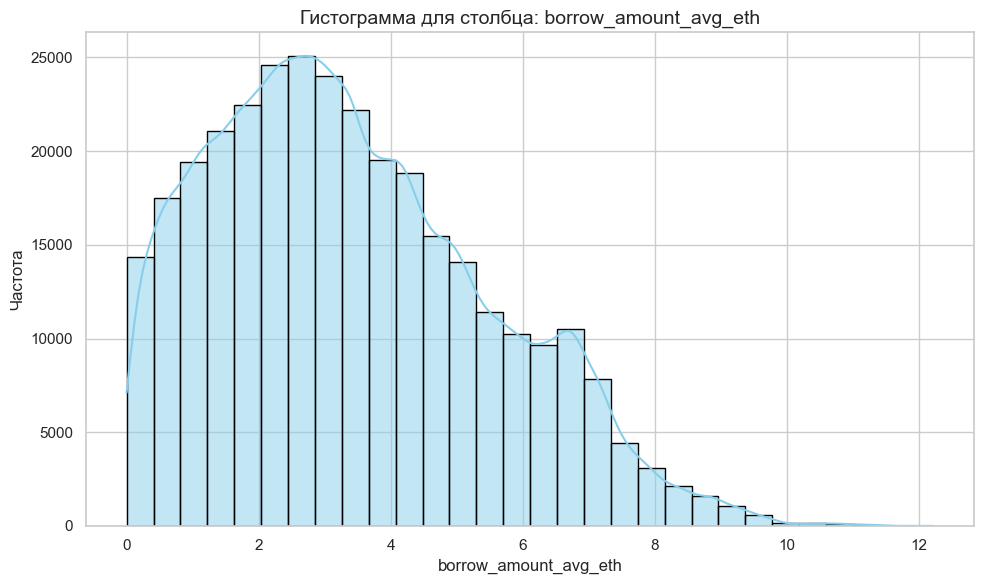

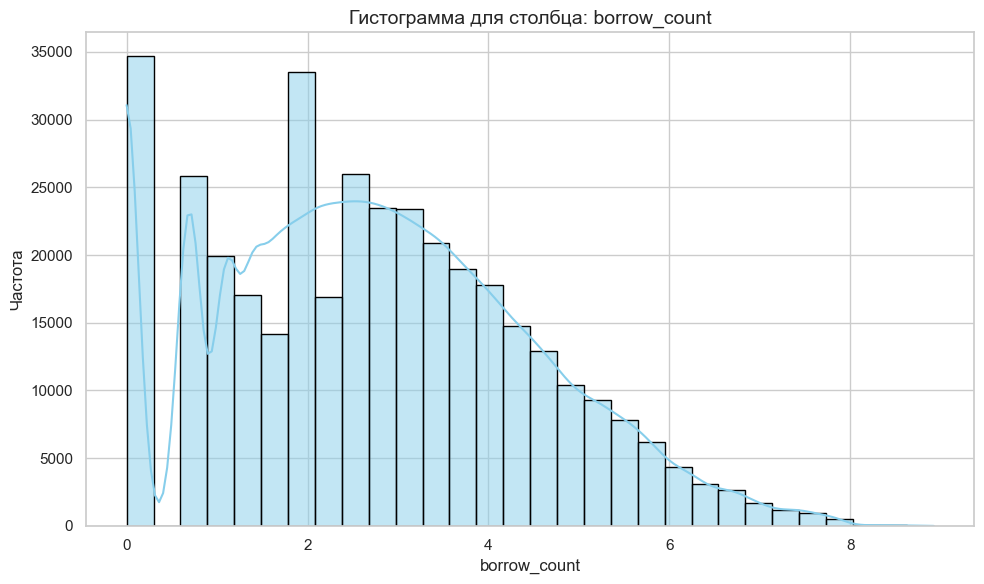

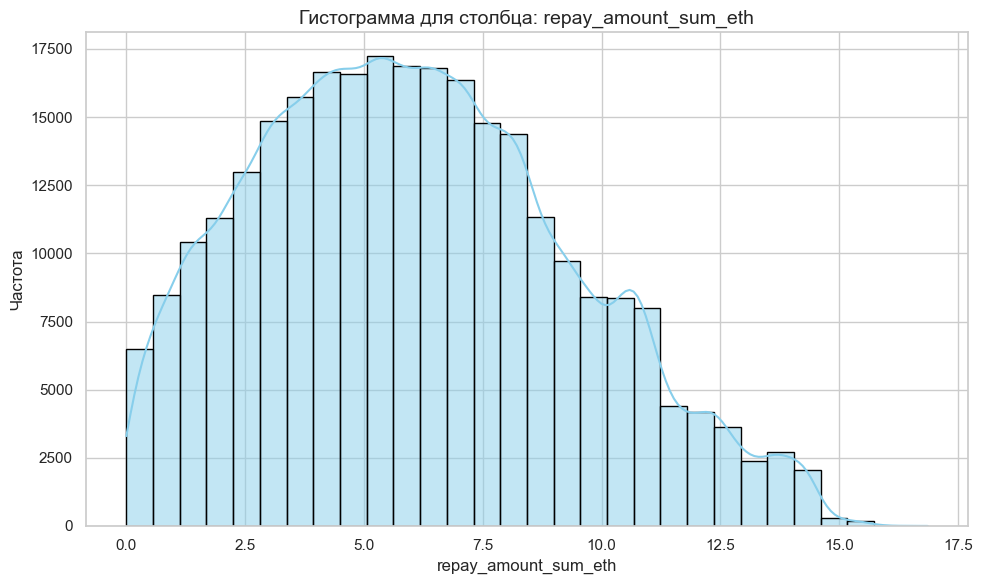

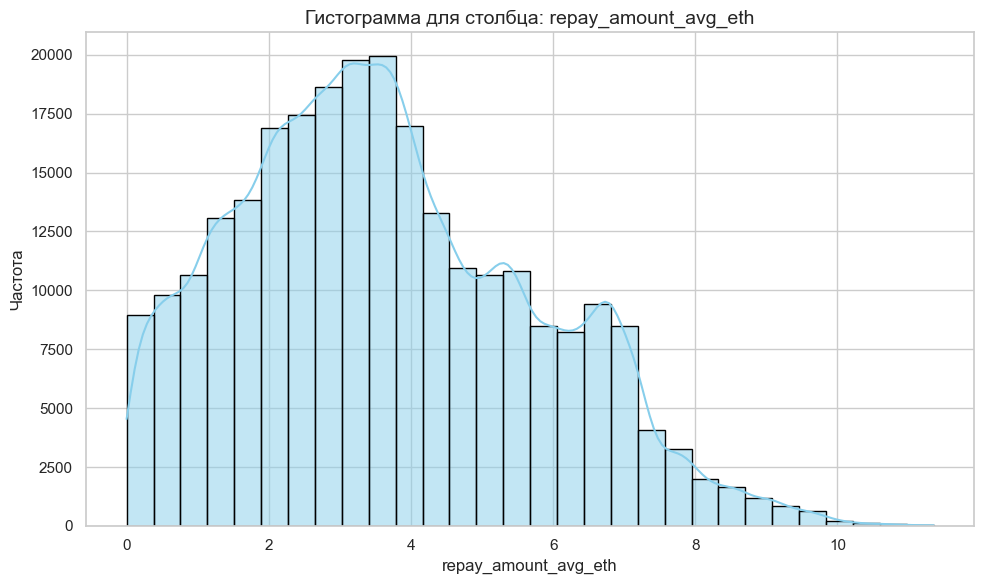

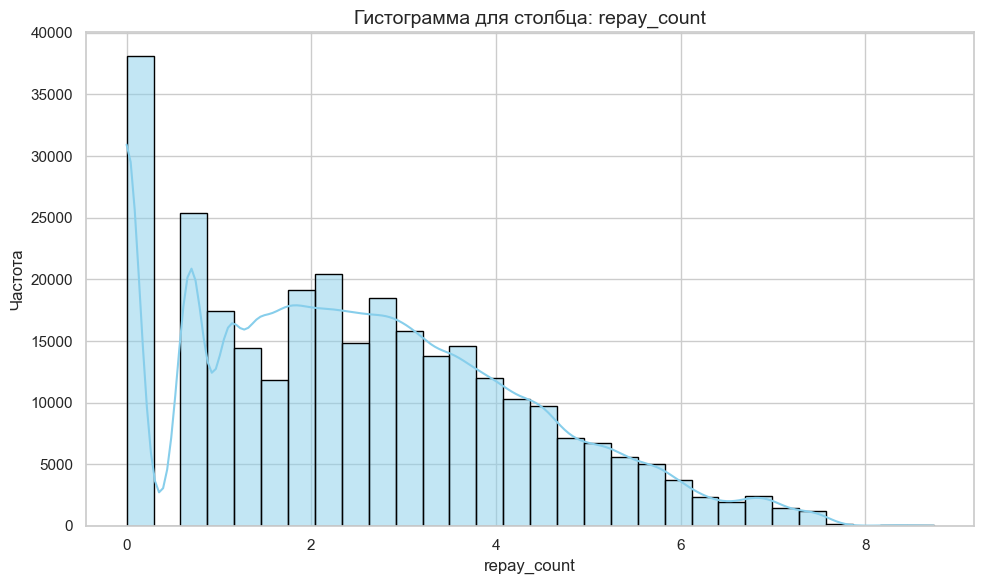

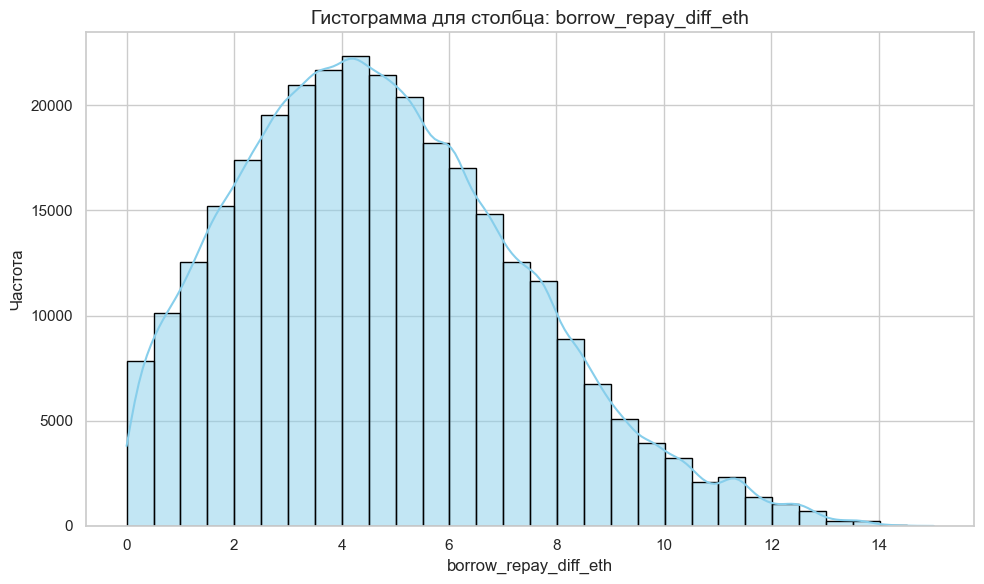

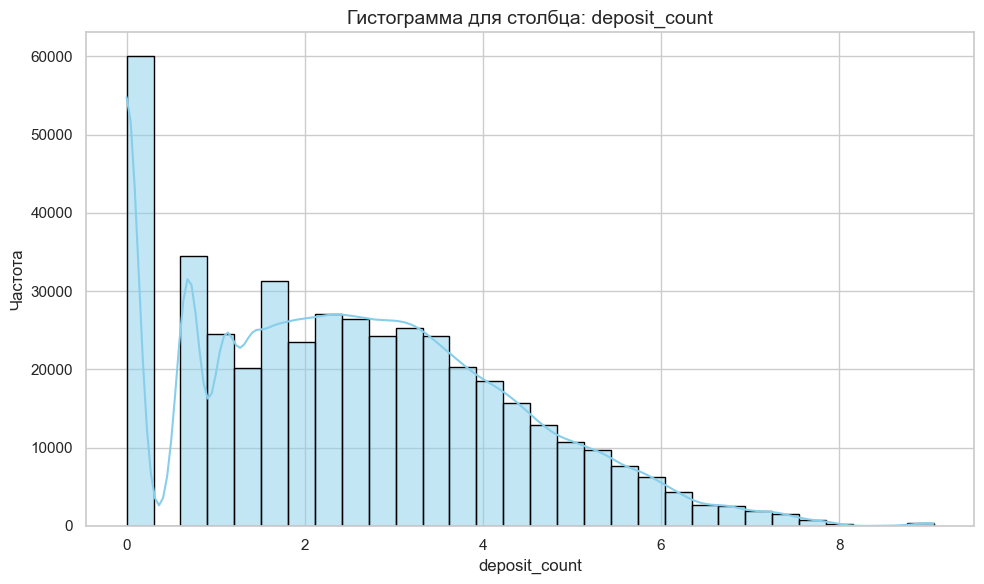

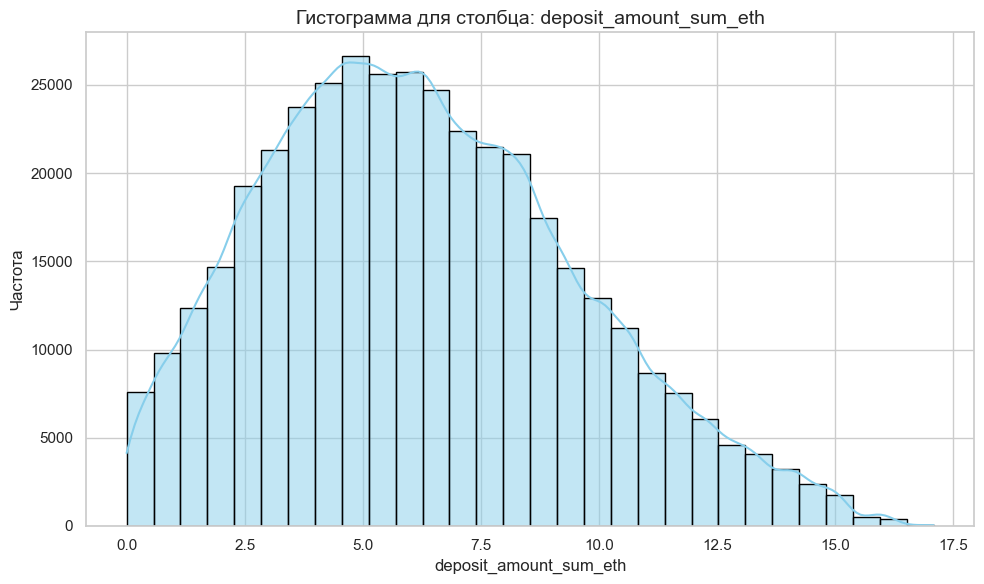

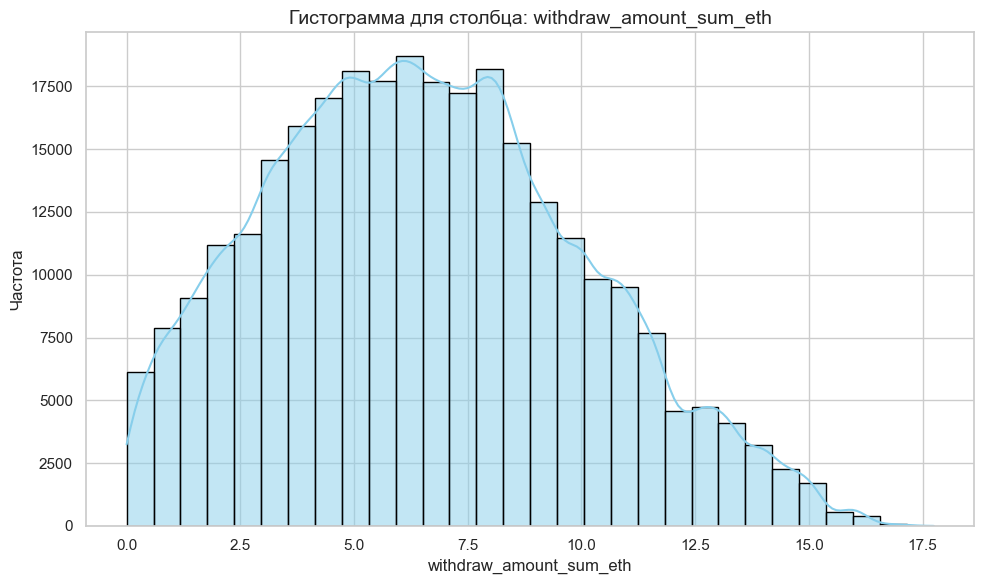

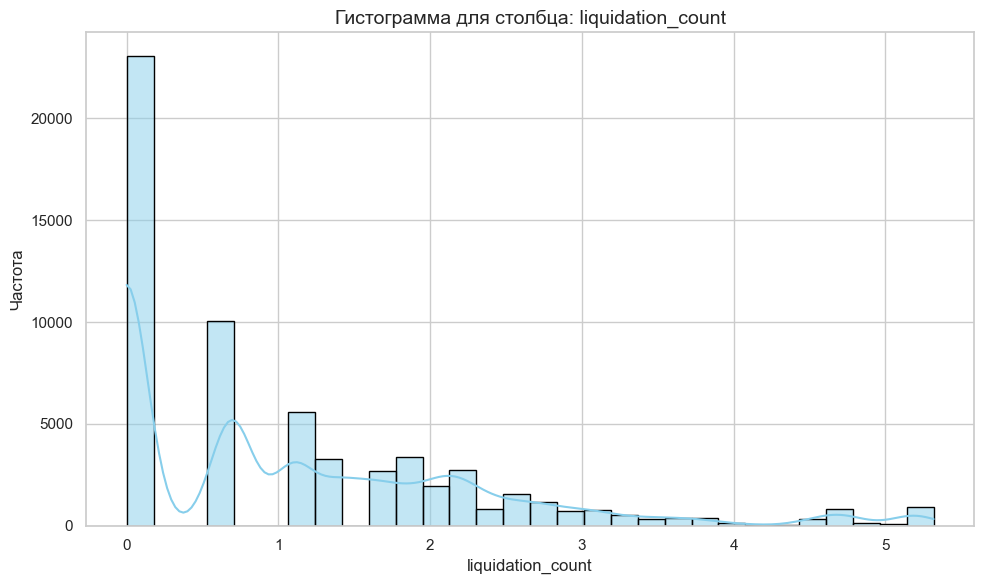

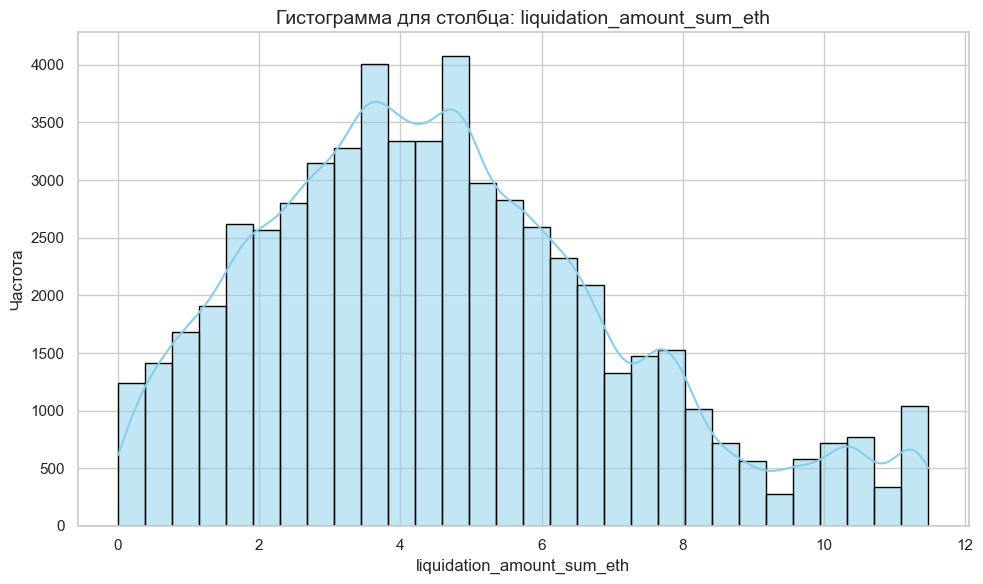

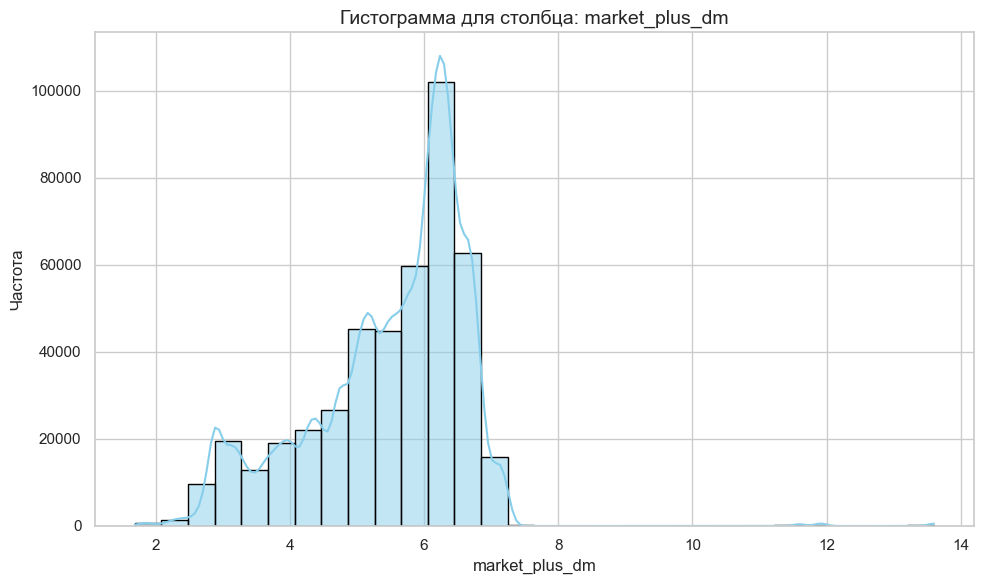

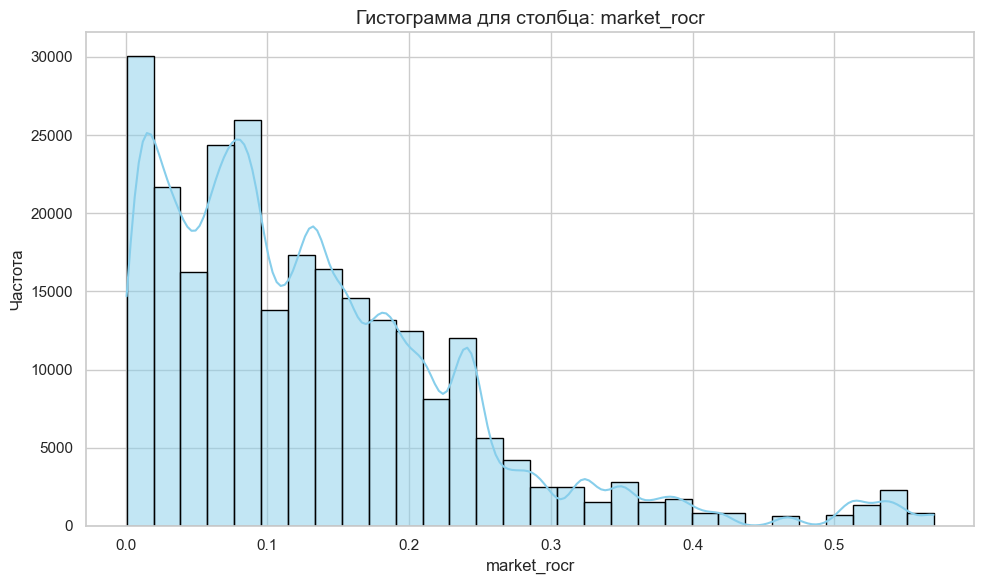

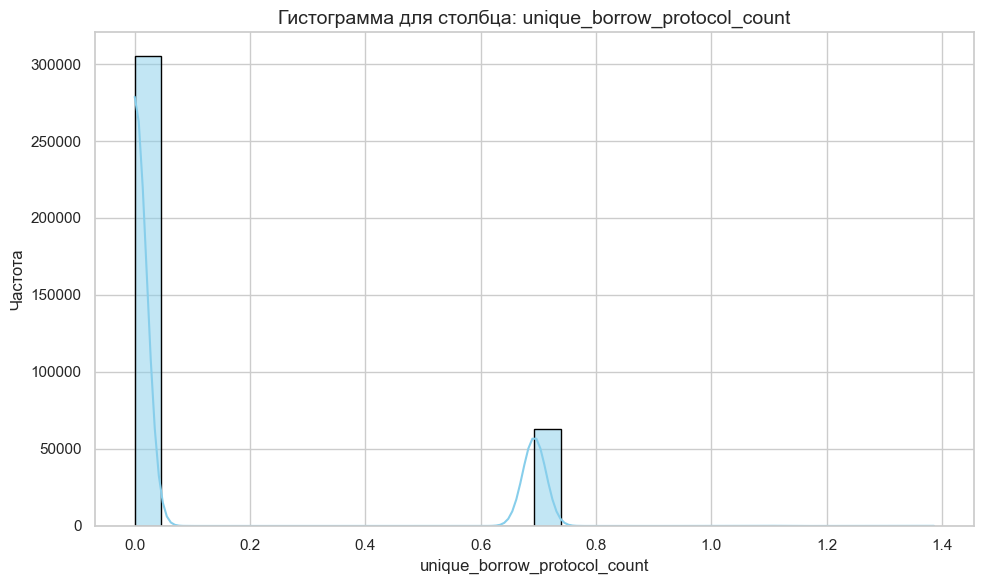

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


for column in extreme_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        x=raw_data[column].apply(lambda x: np.log(x) if x >= 1 else np.nan),
        kde=True,  # Добавляем кривую плотности
        bins=30,   # Количество бинов
        color='skyblue',
        edgecolor='black'
    )
    
    # Настройка заголовка и подписей
    plt.title(f'Гистограмма для столбца: {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    
    # Отображение графика
    plt.tight_layout()
    plt.show()

В принципе, данные после логарифмирования выглядять нормально и сильных выбросов не наблюдается. Но логарифмирование лишает нас отрицательных значений, поэтому нужно нормализовать данные по другому

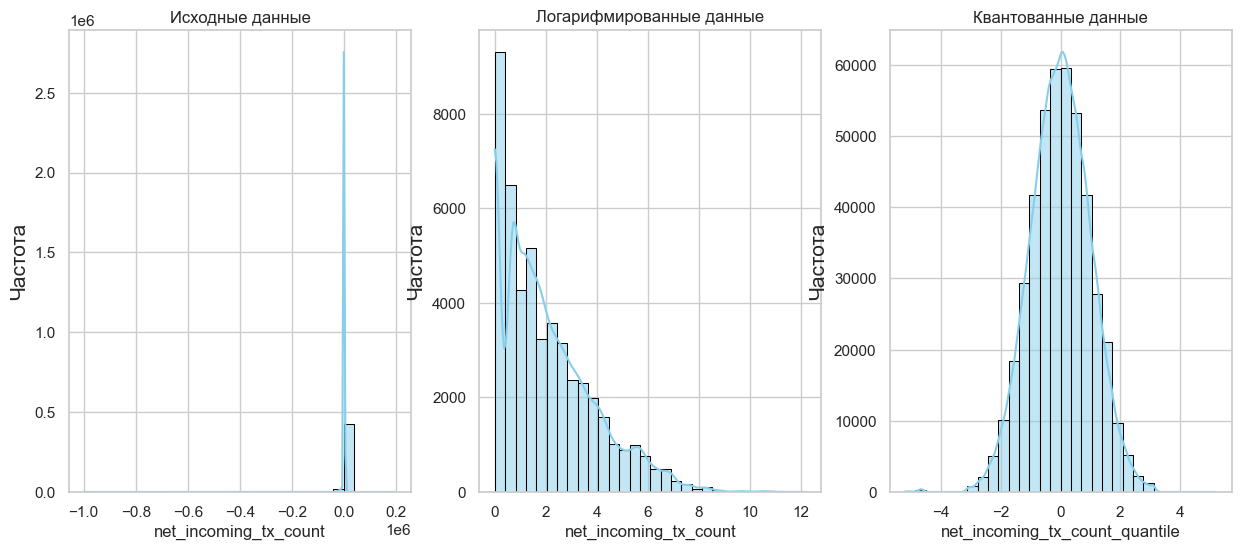

In [13]:
fig, axs = plt.subplots(figsize=(15, 6), ncols=3)

sns.histplot(
    x=raw_data["net_incoming_tx_count"],
    kde=True,  # Добавляем кривую плотности
    bins=30,   # Количество бинов
    color='skyblue',
    edgecolor='black',
    ax = axs[0]
    )
axs[0].set_title("Исходные данные")
axs[0].set_ylabel('Частота', fontdict={'size': 15})

sns.histplot(
    x=raw_data["net_incoming_tx_count"].apply(lambda x: np.log(x) if x >= 1 else np.nan),
    kde=True,  # Добавляем кривую плотности
    bins=30,   # Количество бинов
    color='skyblue',
    edgecolor='black',
    ax = axs[1]
    )
axs[1].set_title("Логарифмированные данные")
axs[1].set_ylabel('Частота', fontdict={'size': 15})

from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(output_distribution='normal')
transformed_data = transformer.fit_transform(np.array(raw_data["net_incoming_tx_count"].values).reshape(-1, 1))
raw_data["net_incoming_tx_count_quantile"] = transformed_data
sns.histplot(
    x=raw_data["net_incoming_tx_count_quantile"],
    kde=True,  # Добавляем кривую плотности
    bins=30,   # Количество бинов
    color='skyblue',
    edgecolor='black',
    ax = axs[2]
    )
axs[2].set_title("Квантованные данные")
axs[2].set_ylabel('Частота', fontdict={'size': 15})

plt.show()

## Промежуточные выводы

Числовые данные принимают экстремальные значения, но с помощью квантования их всех можно нормализовать
Теперь очередь за переменными, отвечающими за время

## Временные переменные

In [14]:
timestamp_columns = []
for col in raw_data.columns:
    if "timestamp" in col: timestamp_columns.append(col)
# Столбец и так принимает значения от 0 до 1
timestamp_columns.remove("risky_first_last_tx_timestamp_diff")
timestamp_columns

['borrow_timestamp',
 'first_tx_timestamp',
 'last_tx_timestamp',
 'risky_first_tx_timestamp',
 'risky_last_tx_timestamp']

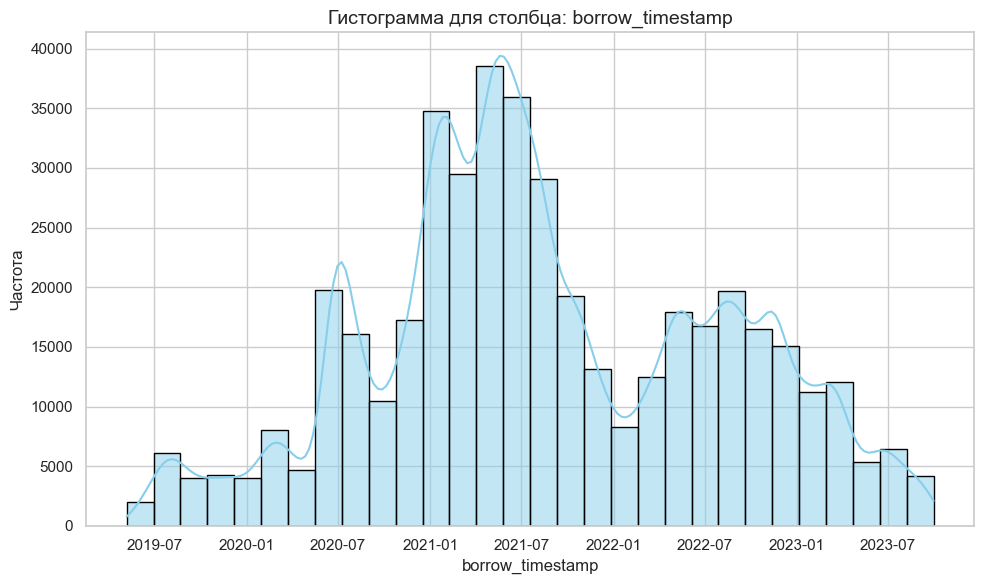

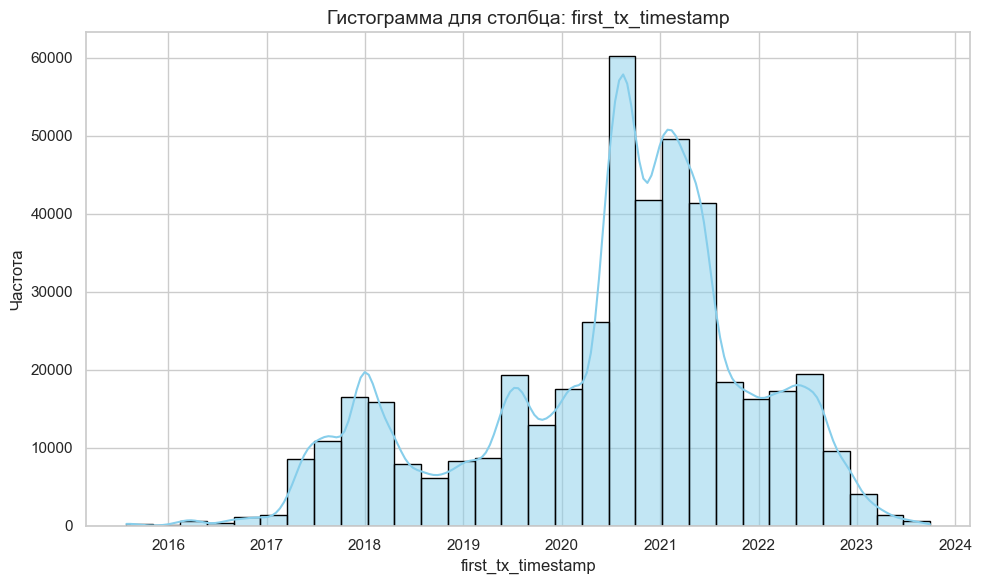

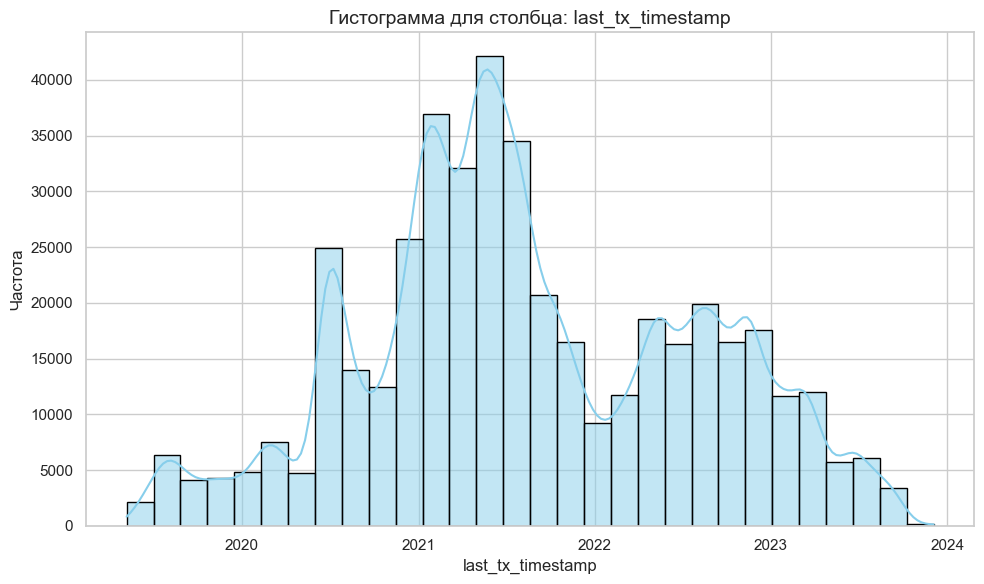

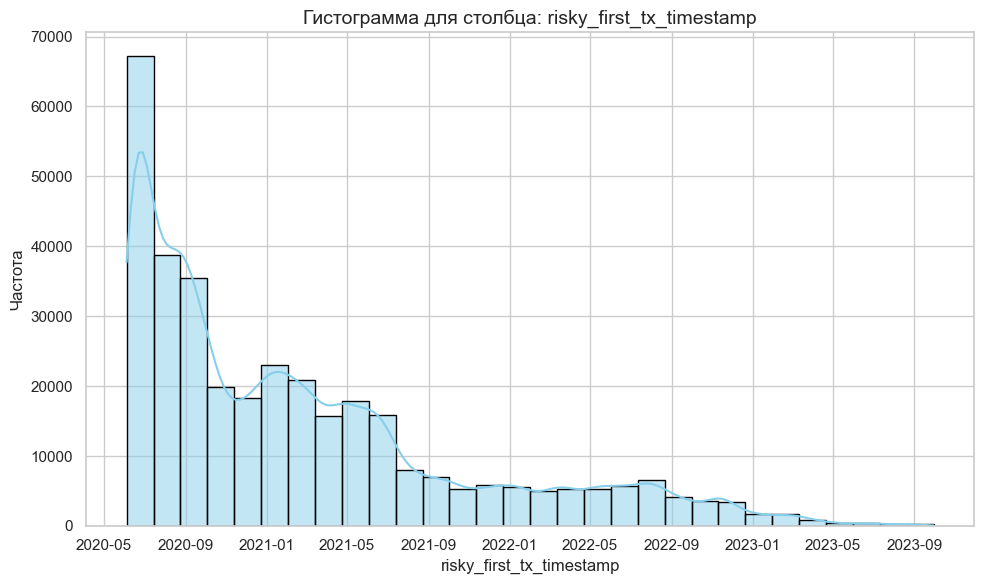

In [15]:
for column in timestamp_columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        x=pd.to_datetime(raw_data[column], unit='s').dt.floor('D'),
        kde=True,  # Добавляем кривую плотности
        bins=30,   # Количество бинов
        color='skyblue',
        edgecolor='black'
    )
    
    # Настройка заголовка и подписей
    plt.title(f'Гистограмма для столбца: {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    
    # Отображение графика
    plt.tight_layout()
    plt.show()

Из этих данные можно извлеч информацию и времени и днях года

In [16]:
raw_data["borrow_timestamp_s"] = pd.to_datetime(raw_data["borrow_timestamp"], unit='s')

In [17]:
raw_data['borrow_timestamp_year'] = raw_data['borrow_timestamp_s'].dt.year
raw_data['borrow_timestamp_month'] = raw_data['borrow_timestamp_s'].dt.month
raw_data['borrow_timestamp_day'] = raw_data['borrow_timestamp_s'].dt.day
raw_data['borrow_timestamp_dayofweek'] = raw_data['borrow_timestamp_s'].dt.dayofweek
raw_data['borrow_timestamp_hour'] = raw_data['borrow_timestamp_s'].dt.hour
raw_data['borrow_timestamp_is_weekend'] = raw_data['borrow_timestamp_dayofweek'] >= 5
raw_data['borrow_timestamp_quarter'] = raw_data['borrow_timestamp_s'].dt.quarter
raw_data['borrow_timestamp_dayofyear'] = raw_data['borrow_timestamp_s'].dt.dayofyear

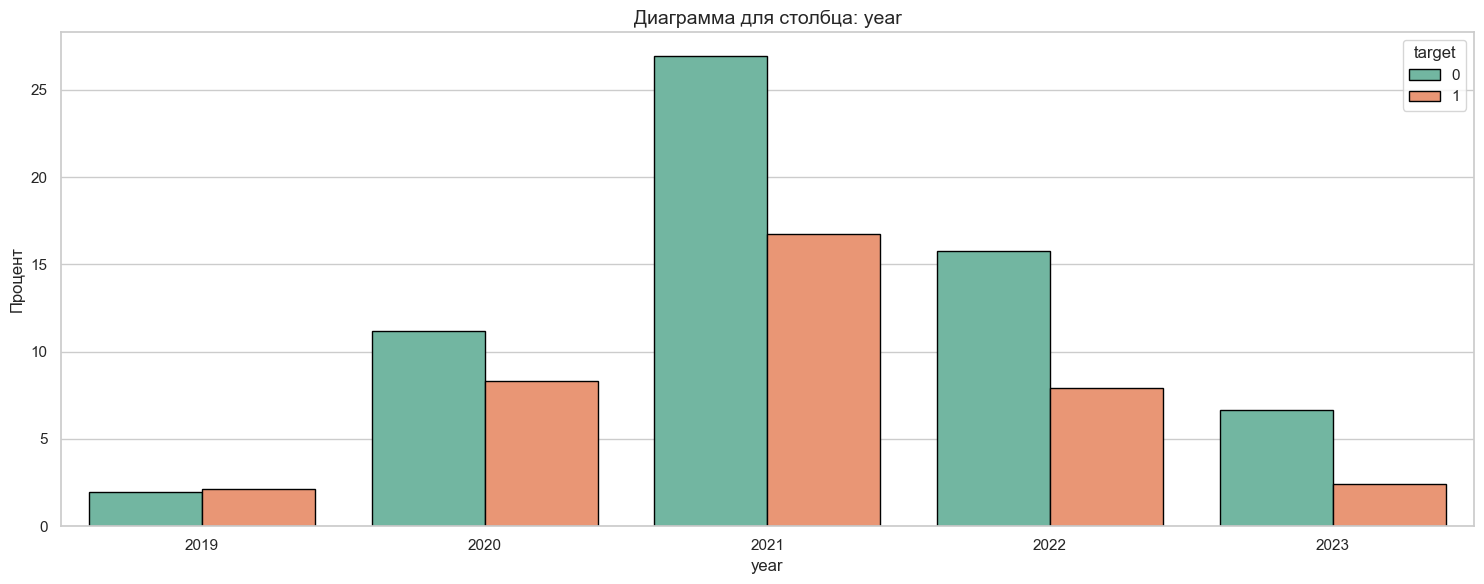

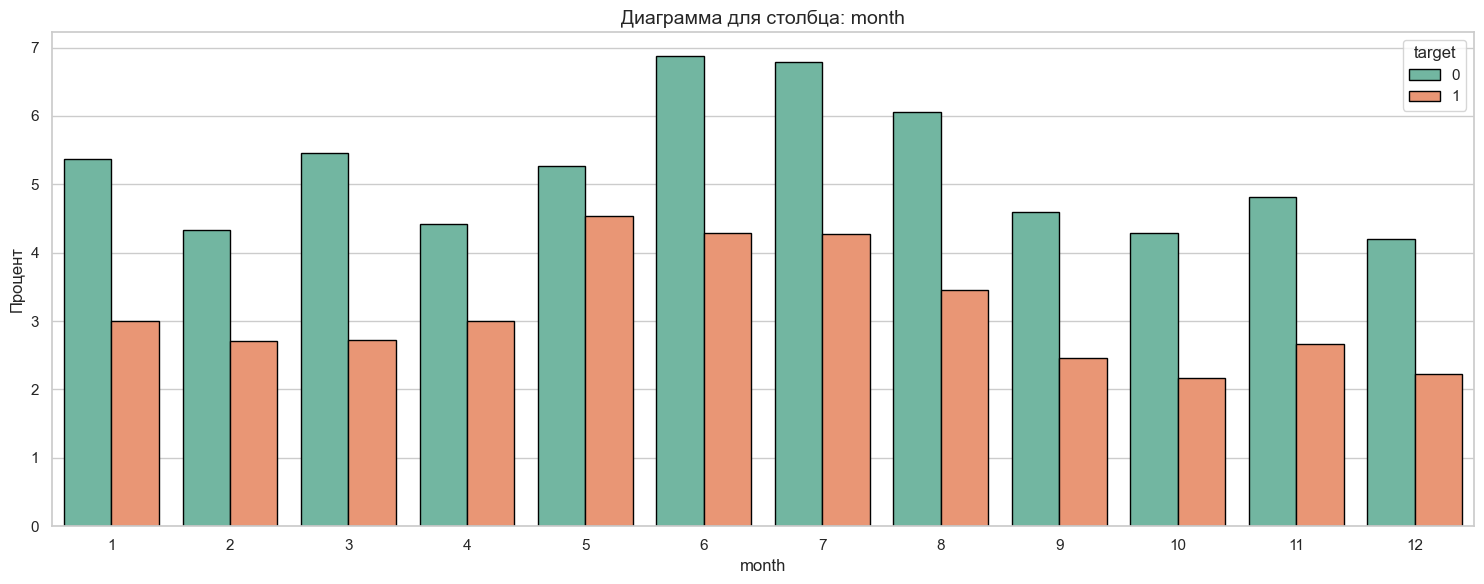

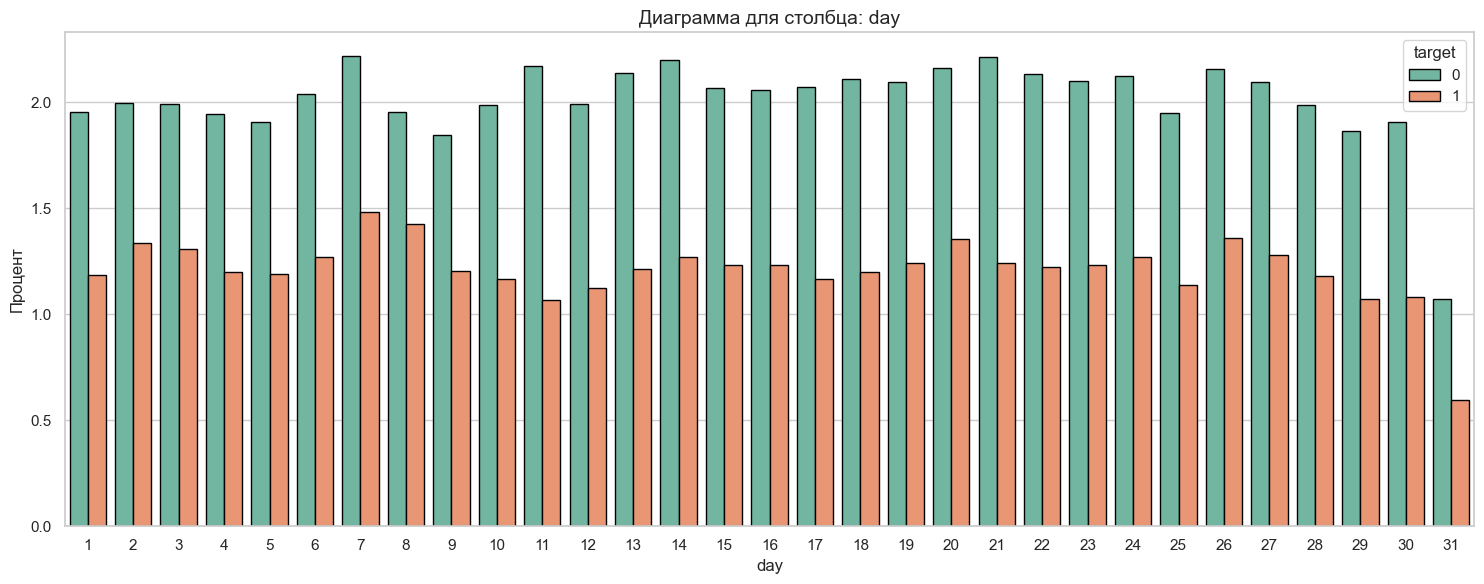

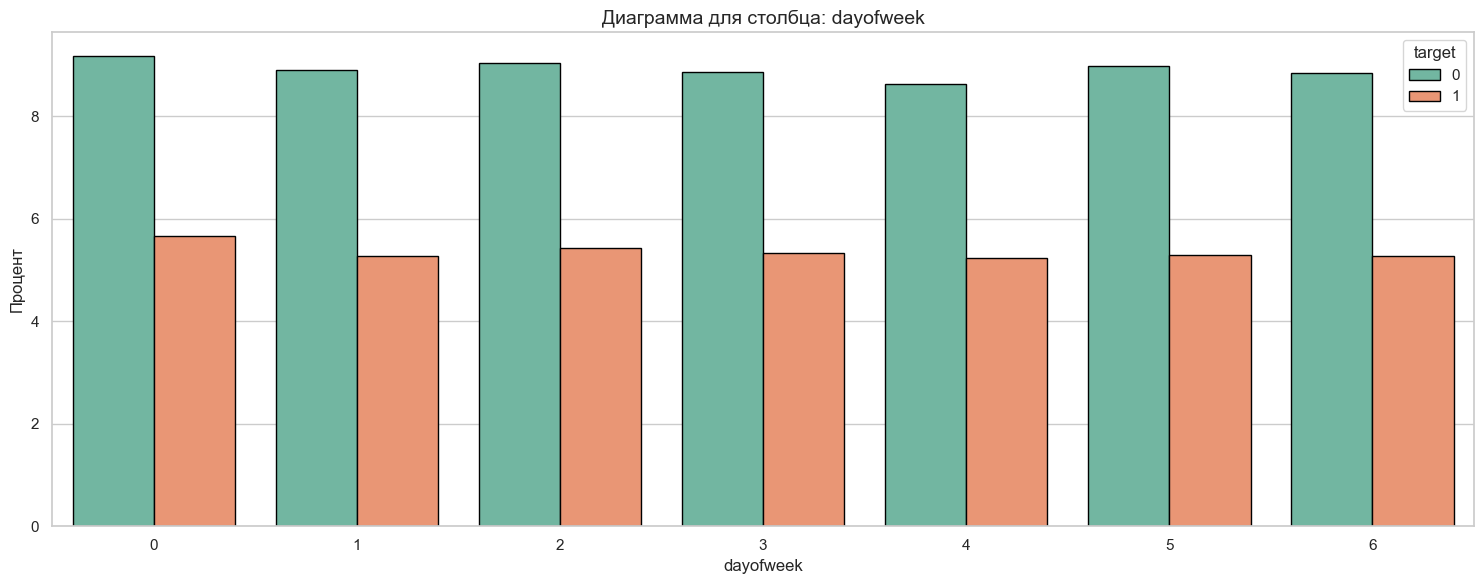

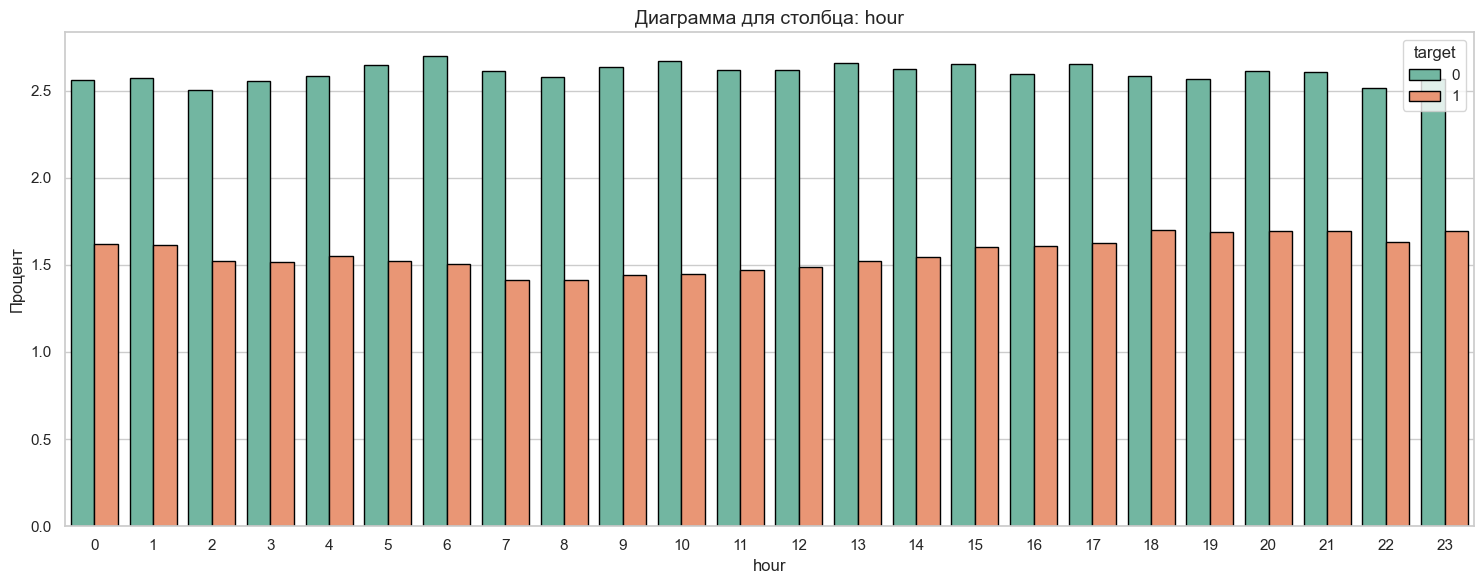

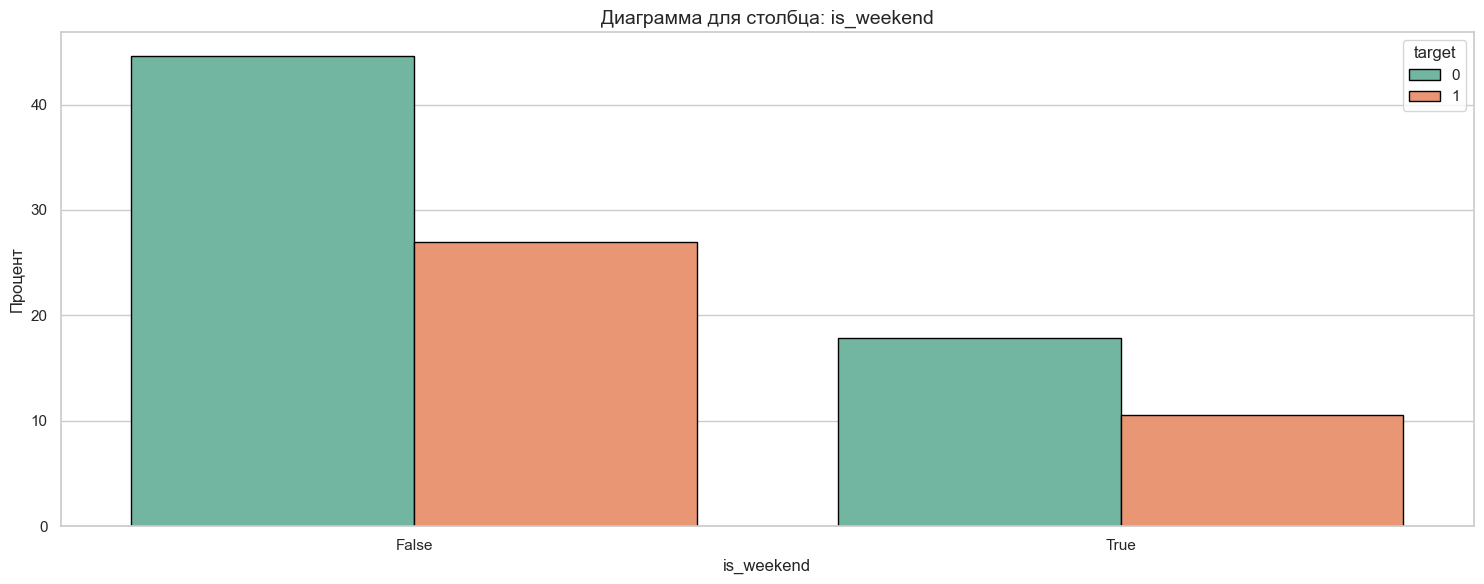

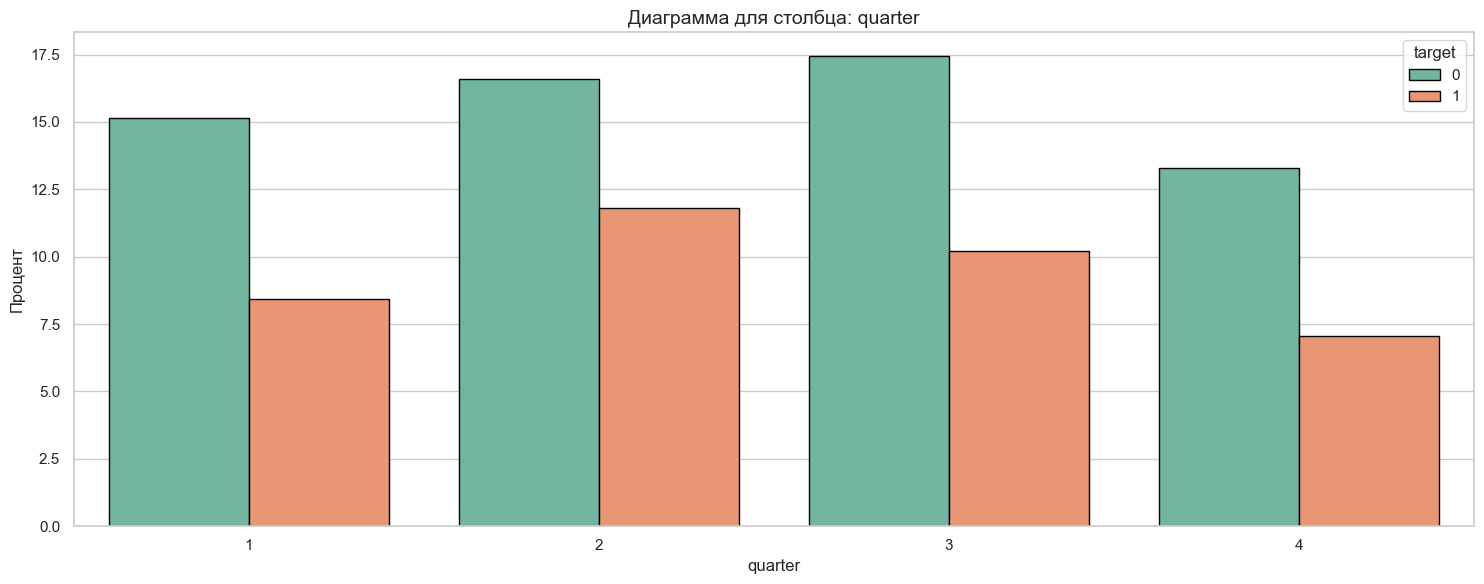

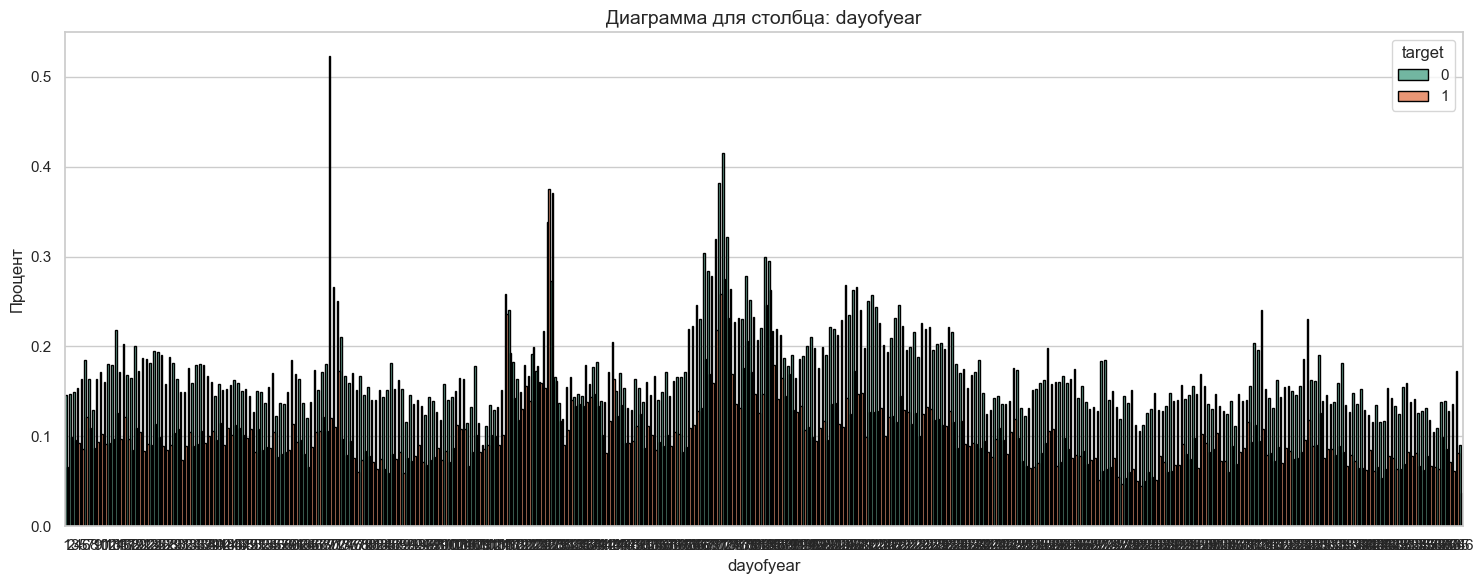

In [26]:
for column in ["year", "month", "day","dayofweek","hour","is_weekend","quarter","dayofyear"]:
    plt.figure(figsize=(15, 6))
    sns.countplot(
        data=raw_data,
        x="borrow_timestamp_"+column,
        palette = 'Set2',
        edgecolor='black',
        hue='target',
        stat='percent'
    )
    
    # Настройка заголовка и подписей
    plt.title(f'Диаграмма для столбца: {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Процент', fontsize=12)
    
    # Отображение графика
    plt.tight_layout()
    plt.show()

Явной связи с таргетом не просматривается, но можно в комбинации с другими признаками получится выделить значимость